# Fase de Analisis y conclusiones 

## Importacion de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%config IPCompleter.greedy=True

pd.options.display.float_format = '{:15.2f}'.format

sns.set_style ("darkgrid")

In [2]:
df = pd.read_pickle("../DATOS/df.pickle")
df.head()

planta  mes  dia  hora  minuto        sensor_id     irradiacion  \
fecha                                                                        
2020-05-15     p1    5   15     0       0  HmiyD2TTLFNqkNe            0.00   
2020-05-15     p1    5   15     0       0  HmiyD2TTLFNqkNe            0.00   
2020-05-15     p1    5   15     0       0  HmiyD2TTLFNqkNe            0.00   
2020-05-15     p1    5   15     0       0  HmiyD2TTLFNqkNe            0.00   
2020-05-15     p1    5   15     0       0  HmiyD2TTLFNqkNe            0.00   

            temperatura_ambiente  temperatura_modulo      inverter_id  \
fecha                                                                   
2020-05-15                 25.18               22.86  1BY6WEcLGh8j5v7   
2020-05-15                 25.18               22.86  1IF53ai7Xc0U56Y   
2020-05-15                 25.18               22.86  3PZuoBAID5Wc2HD   
2020-05-15                 25.18               22.86  7JYdWkrLSPkdwr4   
2020-05-15                 25.18               22.86  McdE0feGgRqW7Ca   

                     kw_dc           kw_ac      eficiencia          kw_dia  \
fecha                                                                        
2020-05-15            0.00            0.00            0.00            0.00   
2020-05-15            0.00            0.00            0.00            0.00   
2020-05-15            0.00            0.00            0.00            0.00   
2020-05-15            0.00            0.00            0.00            0.00   
2020-05-15            0.00            0.00            0.00            0.00   

                  kw_total  
fecha                       
2020-05-15      6259559.00  
2020-05-15      6183645.00  
2020-05-15      6987759.00  
2020-05-15      7602960.00  
2020-05-15      7158964.00

In [3]:
df_diario = pd.read_pickle("../DATOS/df_diario.pickle")
df_diario.head()

planta      inverter_id  irradiacion_min  irradiacion_mean  \
fecha                                                                   
2020-05-15     p1  1BY6WEcLGh8j5v7             0.00              0.20   
2020-05-16     p1  1BY6WEcLGh8j5v7             0.00              0.21   
2020-05-17     p1  1BY6WEcLGh8j5v7             0.00              0.24   
2020-05-18     p1  1BY6WEcLGh8j5v7             0.00              0.16   
2020-05-19     p1  1BY6WEcLGh8j5v7             0.00              0.19   

            irradiacion_max  temperatura_ambiente_min  \
fecha                                                   
2020-05-15             0.89                     22.04   
2020-05-16             0.81                     21.50   
2020-05-17             1.00                     21.21   
2020-05-18             0.97                     20.96   
2020-05-19             0.84                     22.39   

            temperatura_ambiente_mean  temperatura_ambiente_max  \
fecha                                                             
2020-05-15                      27.43                     34.43   
2020-05-16                      26.78                     32.52   
2020-05-17                      26.69                     35.25   
2020-05-18                      23.85                     28.37   
2020-05-19                      25.34                     30.37   

            temperatura_modulo_min  temperatura_modulo_mean  ...  \
fecha                                                        ...   
2020-05-15                   20.29                    32.58  ...   
2020-05-16                   19.59                    31.86  ...   
2020-05-17                   20.38                    32.74  ...   
2020-05-18                   19.48                    27.81  ...   
2020-05-19                   20.06                    29.73  ...   

                 kw_dc_sum       kw_ac_min      kw_ac_mean       kw_ac_max  \
fecha                                                                        
2020-05-15       235340.70            0.00          247.81         1039.35   
2020-05-16       256629.88            0.00          285.51         1095.29   
2020-05-17       288039.82            0.00          293.47         1114.81   
2020-05-18       204030.30            0.00          208.03         1193.63   
2020-05-19       232277.27            0.00          244.53         1059.80   

                 kw_ac_sum  eficiencia_min  eficiencia_mean  eficiencia_max  \
fecha                                                                         
2020-05-15        23046.55            0.00             5.26            9.82   
2020-05-16        25124.49            0.00             5.56            9.83   
2020-05-17        28172.85            0.00             4.99            9.82   
2020-05-18        19970.51            0.00             4.99            9.83   
2020-05-19        22741.18            0.00             4.63            9.83   

                kw_dia_max    kw_total_max  
fecha                                       
2020-05-15         5754.00      6265313.00  
2020-05-16         6292.00      6271605.00  
2020-05-17         7045.00      6278650.00  
2020-05-18         4998.00      6283648.00  
2020-05-19         6449.00      6290097.00  

[5 rows x 24 columns]

## Analisis e insights

### Analisis de la recepción de energía solar

La primera variable de análisis es la recepción de la energía solar.

Tenemos 3 kpis con los que medir esta variable: irradiación que recibe, temperatura ambiente y temperatura del módulo.

Estos kpis se miden con un único sensor por planta, así que el dato es el mismo para todos los inverters.

Tenemos que entender cómo funcionan estas variables entre sí antes de pasar a ver cómo interactúan con el siguiente nivel.

Dado que da igual el inverter y solo necesitamos esas 3 variables vamos a crear un dataset más pequeño con solo un inverter de cada planta. 

In [8]:
recepcion_ener = df.loc[(df.inverter_id =="1BY6WEcLGh8j5v7") | (df.inverter_id=="q49J1IKaHRwDQnt"), "planta":"temperatura_modulo"]
recepcion_ener

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:30:00     p1    5   15     0      30  HmiyD2TTLFNqkNe   
2020-05-15 00:45:00     p1    5   15     0      45  HmiyD2TTLFNqkNe   
2020-05-15 01:00:00     p1    5   15     1       0  HmiyD2TTLFNqkNe   
...                    ...  ...  ...   ...     ...              ...   
2020-06-17 22:45:00     p2    6   17    22      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:00:00     p2    6   17    23       0  iq8k7ZNt4Mwm3w0   
2020-06-17 23:15:00     p2    6   17    23      15  iq8k7ZNt4Mwm3w0   
2020-06-17 23:30:00     p2    6   17    23      30  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   

                        irradiacion  temperatura_ambiente  temperatura_modulo  
fecha                                                                          
2020-05-15 00:00:00            0.00                 25.18               22.86  
2020-05-15 00:15:00            0.00                 25.08               22.76  
2020-05-15 00:30:00            0.00                 24.94               22.59  
2020-05-15 00:45:00            0.00                 24.85               22.36  
2020-05-15 01:00:00            0.00                 24.62               22.17  
...                             ...                   ...                 ...  
2020-06-17 22:45:00            0.00                 23.51               22.86  
2020-06-17 23:00:00            0.00                 23.48               22.74  
2020-06-17 23:15:00            0.00                 23.35               22.49  
2020-06-17 23:30:00            0.00                 23.29               22.37  
2020-06-17 23:45:00            0.00                 23.20               22.54  

[6413 rows x 9 columns]

### Diferencia en la energía recibida por planta 

In [11]:
temp = recepcion_ener.groupby("planta").agg({"irradiacion":"sum",
                                     "temperatura_ambiente":"mean",
                                     "temperatura_modulo":"mean"}).round(2)
temp

irradiacion  temperatura_ambiente  temperatura_modulo
planta                                                          
p1              726.40                 25.56               31.18
p2              758.49                 28.07               32.77

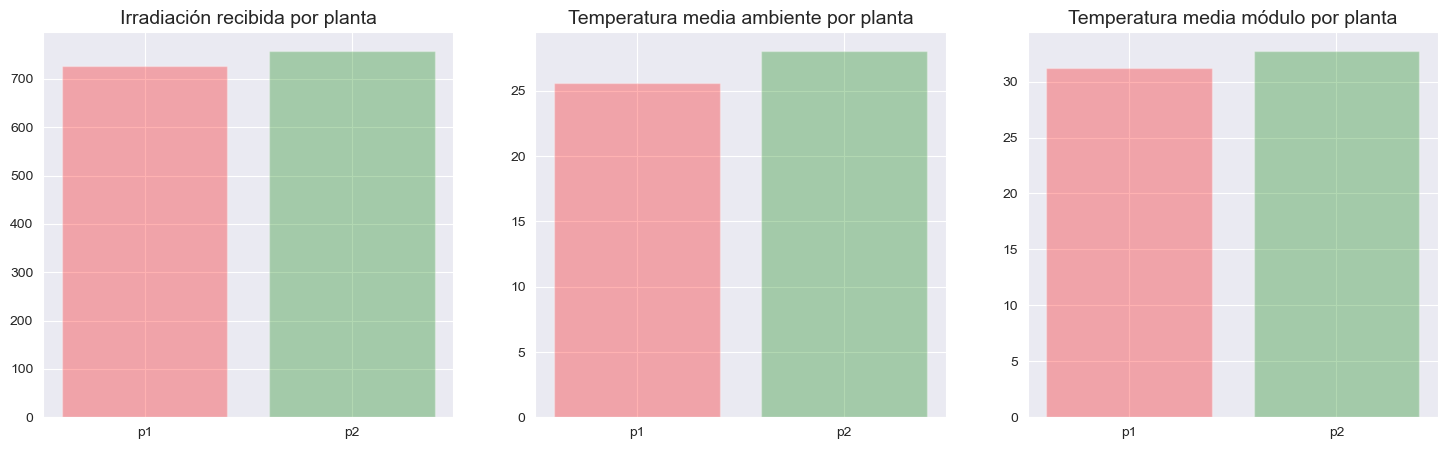

In [12]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

ax[0].bar(temp.index, temp.irradiacion, color=["red", "green"], alpha =0.3)
ax[1].bar(temp.index, temp.temperatura_ambiente, color=["red", "green"], alpha =0.3)
ax[2].bar(temp.index, temp.temperatura_modulo, color=["red", "green"], alpha =0.3)
ax[0].set_title(label="Irradiación recibida por planta", size=14)
ax[1].set_title(label="Temperatura media ambiente por planta", size=14)
ax[2].set_title(label="Temperatura media módulo por planta", size=14);

**Conclusiones:**

* En general la planta 2 recibe más energía solar que la 1
* Pero esta diferencia no puede implicar el problema de rendimiento que parece que existe

### Relacion entre irradiación, temperatura ambiente y temperatura módulo

In [13]:
temp = recepcion_ener.loc[:, ["planta","irradiacion", "temperatura_ambiente", "temperatura_modulo"]]
temp

planta     irradiacion  temperatura_ambiente  \
fecha                                                              
2020-05-15 00:00:00     p1            0.00                 25.18   
2020-05-15 00:15:00     p1            0.00                 25.08   
2020-05-15 00:30:00     p1            0.00                 24.94   
2020-05-15 00:45:00     p1            0.00                 24.85   
2020-05-15 01:00:00     p1            0.00                 24.62   
...                    ...             ...                   ...   
2020-06-17 22:45:00     p2            0.00                 23.51   
2020-06-17 23:00:00     p2            0.00                 23.48   
2020-06-17 23:15:00     p2            0.00                 23.35   
2020-06-17 23:30:00     p2            0.00                 23.29   
2020-06-17 23:45:00     p2            0.00                 23.20   

                     temperatura_modulo  
fecha                                    
2020-05-15 00:00:00               22.86  
2020-05-15 00:15:00               22.76  
2020-05-15 00:30:00               22.59  
2020-05-15 00:45:00               22.36  
2020-05-15 01:00:00               22.17  
...                                 ...  
2020-06-17 22:45:00               22.86  
2020-06-17 23:00:00               22.74  
2020-06-17 23:15:00               22.49  
2020-06-17 23:30:00               22.37  
2020-06-17 23:45:00               22.54  

[6413 rows x 4 columns]

In [14]:
temp[["irradiacion","temperatura_ambiente", "temperatura_modulo"]].corr().round(2)

irradiacion  temperatura_ambiente  temperatura_modulo
irradiacion                     1.00                  0.65                0.95
temperatura_ambiente            0.65                  1.00                0.82
temperatura_modulo              0.95                  0.82                1.00

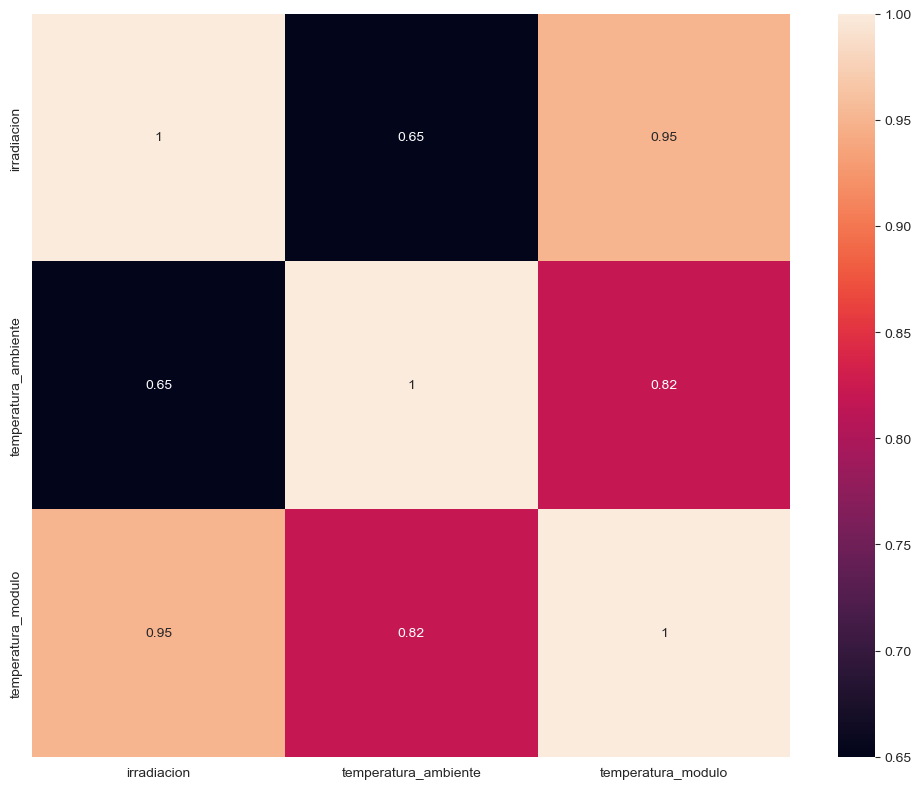

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(temp[["irradiacion","temperatura_ambiente", "temperatura_modulo"]].corr().round(2), annot=True)
plt.tight_layout()
plt.savefig('grafico correlaciones', bbox_inches='tight');

- La correlación entre irradiación y temperatura ambiente se podría esperar que fuera más elevada, sin embargo puede deberse a que al principio del día cuando el sol empieza a generar energía, la temperatura ambiente es más fría al venir de la noche, y empieza a calentarse poco a poco.   

In [16]:
sns.pairplot(temp.reset_index(), hue = 'planta', height=3, plot_kws={'alpha': 0.1});

Conclusiones
- La irradiacion correlaciona mucho, practicamente 1 con la temperatura del módulo
- La irradiación correlaciona menos con la temperatura ambiente, aunque es una correlación alta
- Podemos tratar de identificar módulos que generen poco DC cuando la irradiación es alta, ya que no hemos visto problemas en la irradiación. 

### Análisis de la iradiación y la temperatura a lo largo del día

In [17]:
temp = pd.crosstab(df.hora, df.planta, values = df.irradiacion, aggfunc="mean")
temp

planta              p1              p2
hora                                  
0                 0.00            0.00
1                 0.00            0.00
2                 0.00            0.00
3                 0.00            0.00
4                 0.00            0.00
5                 0.00            0.00
6                 0.04            0.04
7                 0.19            0.19
8                 0.37            0.38
9                 0.53            0.57
10                0.64            0.68
11                0.73            0.75
12                0.74            0.78
13                0.69            0.68
14                0.58            0.59
15                0.46            0.43
16                0.29            0.28
17                0.13            0.12
18                0.02            0.02
19                0.00            0.00
20                0.00            0.00
21                0.00            0.00
22                0.00            0.00
23                0.00            0.00

In [18]:
plt.figure(figsize=(8,10))
sns.heatmap(temp, annot=True, fmt=".2f")
plt.title("Análisis de la irradiación media por hora")
plt.savefig("irradiacion por horas");

- Entre las 11 y las 13 es cuando se produce la mayor irradiación. 
- A partir de las 18 de la tarde se deja de recibir irradiación

**Analisis de la temperatura media por horas**

In [23]:
temp = pd.crosstab(df.hora, df.planta, values = df.temperatura_ambiente, aggfunc="mean")
temp

planta              p1              p2
hora                                  
0                22.80           25.16
1                22.63           24.79
2                22.46           24.44
3                22.32           24.23
4                22.17           24.03
5                22.06           23.88
6                22.20           24.17
7                23.34           25.45
8                24.92           27.00
9                26.48           28.55
10               27.65           30.10
11               28.80           31.36
12               29.62           32.47
13               30.10           32.89
14               30.29           33.01
15               29.99           32.61
16               29.37           32.24
17               28.29           31.37
18               26.72           29.82
19               25.30           28.44
20               24.50           27.48
21               23.88           26.63
22               23.26           25.98
23               22.92           25.40

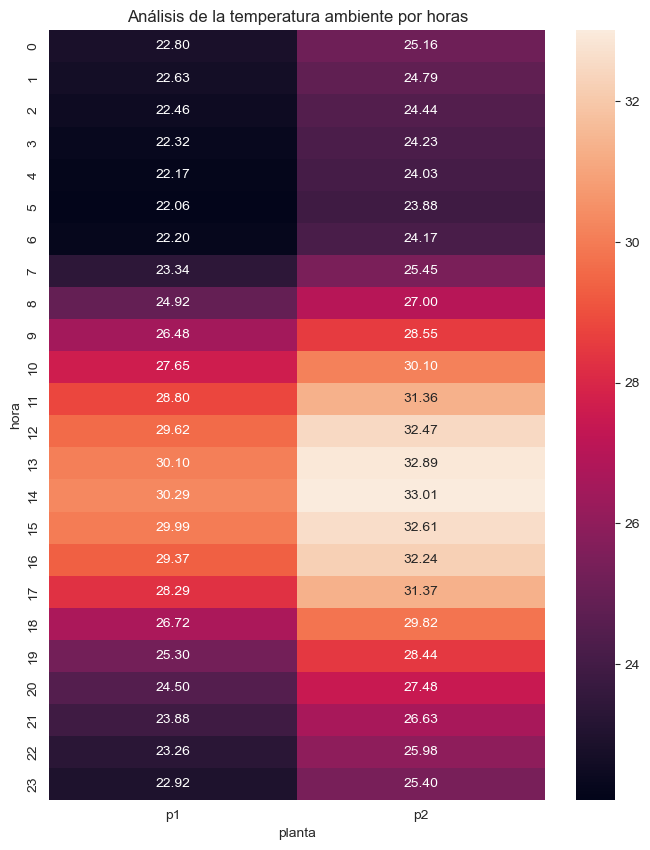

In [24]:
plt.figure(figsize=(8,10))
sns.heatmap(temp, annot=True,  fmt='.2f')
plt.title("Análisis de la temperatura ambiente por horas");
plt.savefig("TemperaturaPorHoras")

**Conclusiones:**

* Ambas plantas tienen patrones similares. Podríamos pensar que están en zonas geográficas no muy alejadas
* Existe irradiación (y por tanto a priori las plantas deberían producir) entre las 7 y las 17
* La irradiación máxima se produce entre las 11 y las 12
* La temperatura ambiente máxima se produce entre las 14 y las 16
* Se produce un lag entre la irradiación y la temperatura, la máxima irradiación se produce a las 12 del medio día, mientras que la máxima tempratura se produce a las 14:00. 



### Análisis de la irradiación frente a la energía corriente (DC) generada

In [28]:
plt.figure(figsize= (18,8))
sns.scatterplot(data= df, x="irradiacion", y="kw_dc", hue="planta");

La planta número 2 produce muchos menos kw ante los mismos niveles de irradiación.

Pero antes habíamos visto que la relación entre dc y ac en la planta 1 era rara.

Y también que los datos de dc y ac no cuadraban con los de kw_dia.

Parece que hay algo raro en los datos.

Vamos a ver la relación entre la irradiación y kw_dia a ver si encontrmos alguina conclusión



**Análisis de la irradiación con el acumulado de los Kw generados por día**

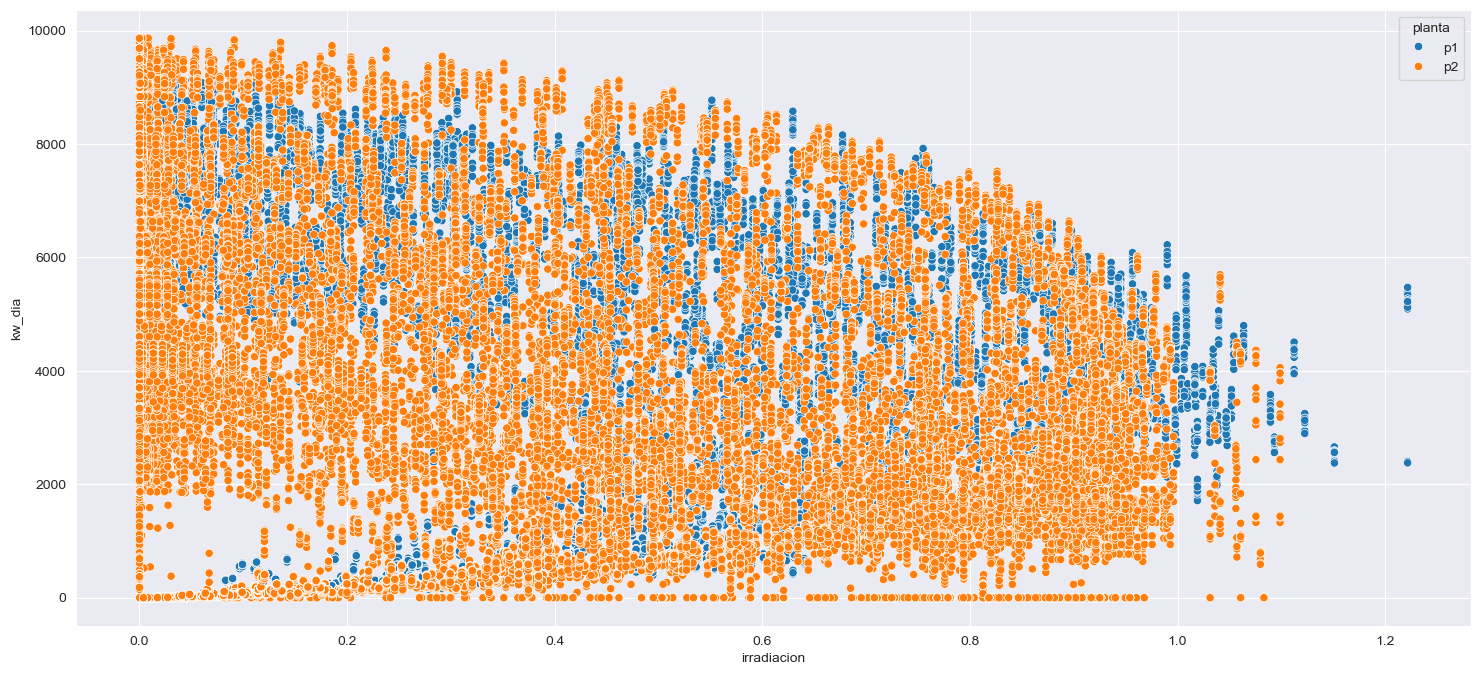

In [119]:
plt.figure(figsize= (18,8))
sns.scatterplot(data= df, x="irradiacion", y="kw_dia", hue="planta");

Es muy extraño. Parece que la relación es que a más irradiación menos kw generados. Lo cual no tiene sentido.

Incluso parece que los máximos de kw se producen en horas de irradiación cero.

Hay que tener en cuenta que la variable kw_dia es un **acumulado**. Eso significa que debería alcanzar su máximo cuando llega la última hora del día, por ej las 23:45, donde al ser de noche la irradiación es cero.

No debería haber datos hasta pasadas las 7 que es cuando vemos que hay irradiación.

Lo comprobamos: 

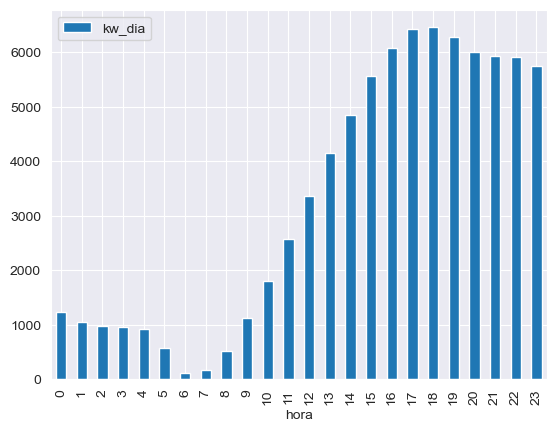

In [120]:
df.groupby("hora")[["kw_dia"]].mean().plot.bar();

No tiene mucho sentido la generación entre las 00 y las 06.

Y además a partir de las 18 comienza a decaer, lo cual no debería pasar si es un acumulado.

Conclusión:

No nos fiamos de estas variables acumuladas como kw_dia y kw_total.

Tampoco parecen del todo correctos los datos de energía DC y AC. 

En una situación real habría que preguntar a los expertos en el proyecto hasta ser capaz de ver qué pasa con los datos.

Pero para poder continuar vamos a asumir que los datos de dc y ac son correctos.

Y bajo esa asunción obtendremos nuestras conclusiones.
-  No tiene mucho sentido la bajada a partir de las 19 de la tarde
- En las horas iniciales del día vemos que hay datos acumulados, a priori creemos que el contador debería empezar de 0

**INSIGHT #1**

La planta 2 genera niveles mucho más bajos de DC incluso a niveles similares de irradiación

### ¿Es constante la generación de energía a lo largo del día?

In [121]:
plt.figure(figsize=(18,10))
sns.lineplot(data=df_diario.reset_index(),
             x=df_diario.index,
             y="kw_dc_sum",
             hue="planta");

- Vemos que la planta 1 tiene mucha más variabilidad mientras que la planta 2 es mucho más constante.

- Pero sobre todo nos extraña los bajos niveles de generacion de DC en de la planta 2 en comparación con la 1.

- Analizamos la generación de cada día a ver si vemos algo raro.

- Generamos una variable date para poder agregar por ella.

**Analisis de la cantidad de energía dc se ha generado en la planta 1 cada día por horas**

In [29]:
df["date"] = df.index.date 

In [31]:
dc_hora_p1 = df[df.planta=="p1"].groupby(["planta", "date", "hora"])["kw_dc"].sum()
dc_hora_p1

planta  date        hora
p1      2020-05-15  0                 0.00
                    1                 0.00
                    2                 0.00
                    3                 0.00
                    4                 0.00
                                 ...      
        2020-06-17  19                0.00
                    20                0.00
                    21                0.00
                    22                0.00
                    23                0.00
Name: kw_dc, Length: 796, dtype: float64

In [34]:
dc_hora_p1.unstack(level=1).head() #Unstack para quitar el multiindice y tener la fecha en las columnas

date             2020-05-15      2020-05-16      2020-05-17      2020-05-18  \
planta hora                                                                   
p1     0               0.00             NaN            0.00            0.00   
       1               0.00             NaN            0.00            0.00   
       2               0.00            0.00            0.00            0.00   
       3               0.00            0.00            0.00            0.00   
       4               0.00            0.00            0.00            0.00   

date             2020-05-19      2020-05-20  2020-05-21      2020-05-22  \
planta hora                                                               
p1     0               0.00            0.00         NaN            0.00   
       1               0.00            0.00         NaN            0.00   
       2               0.00            0.00         NaN            0.00   
       3               0.00            0.00         NaN            0.00   
       4               0.00            0.00         NaN            0.00   

date             2020-05-23      2020-05-24  ...      2020-06-08  \
planta hora                                  ...                   
p1     0               0.00            0.00  ...            0.00   
       1               0.00            0.00  ...            0.00   
       2               0.00            0.00  ...            0.00   
       3               0.00            0.00  ...            0.00   
       4               0.00            0.00  ...            0.00   

date             2020-06-09      2020-06-10      2020-06-11      2020-06-12  \
planta hora                                                                   
p1     0               0.00            0.00            0.00            0.00   
       1               0.00            0.00            0.00            0.00   
       2               0.00            0.00            0.00            0.00   
       3               0.00            0.00            0.00            0.00   
       4               0.00            0.00            0.00            0.00   

date             2020-06-13      2020-06-14      2020-06-15      2020-06-16  \
planta hora                                                                   
p1     0               0.00            0.00            0.00            0.00   
       1               0.00            0.00            0.00            0.00   
       2               0.00            0.00            0.00            0.00   
       3               0.00            0.00            0.00            0.00   
       4               0.00            0.00            0.00            0.00   

date             2020-06-17  
planta hora                  
p1     0               0.00  
       1               0.00  
       2               0.00  
       3               0.00  
       4               0.00  

[5 rows x 34 columns]

''

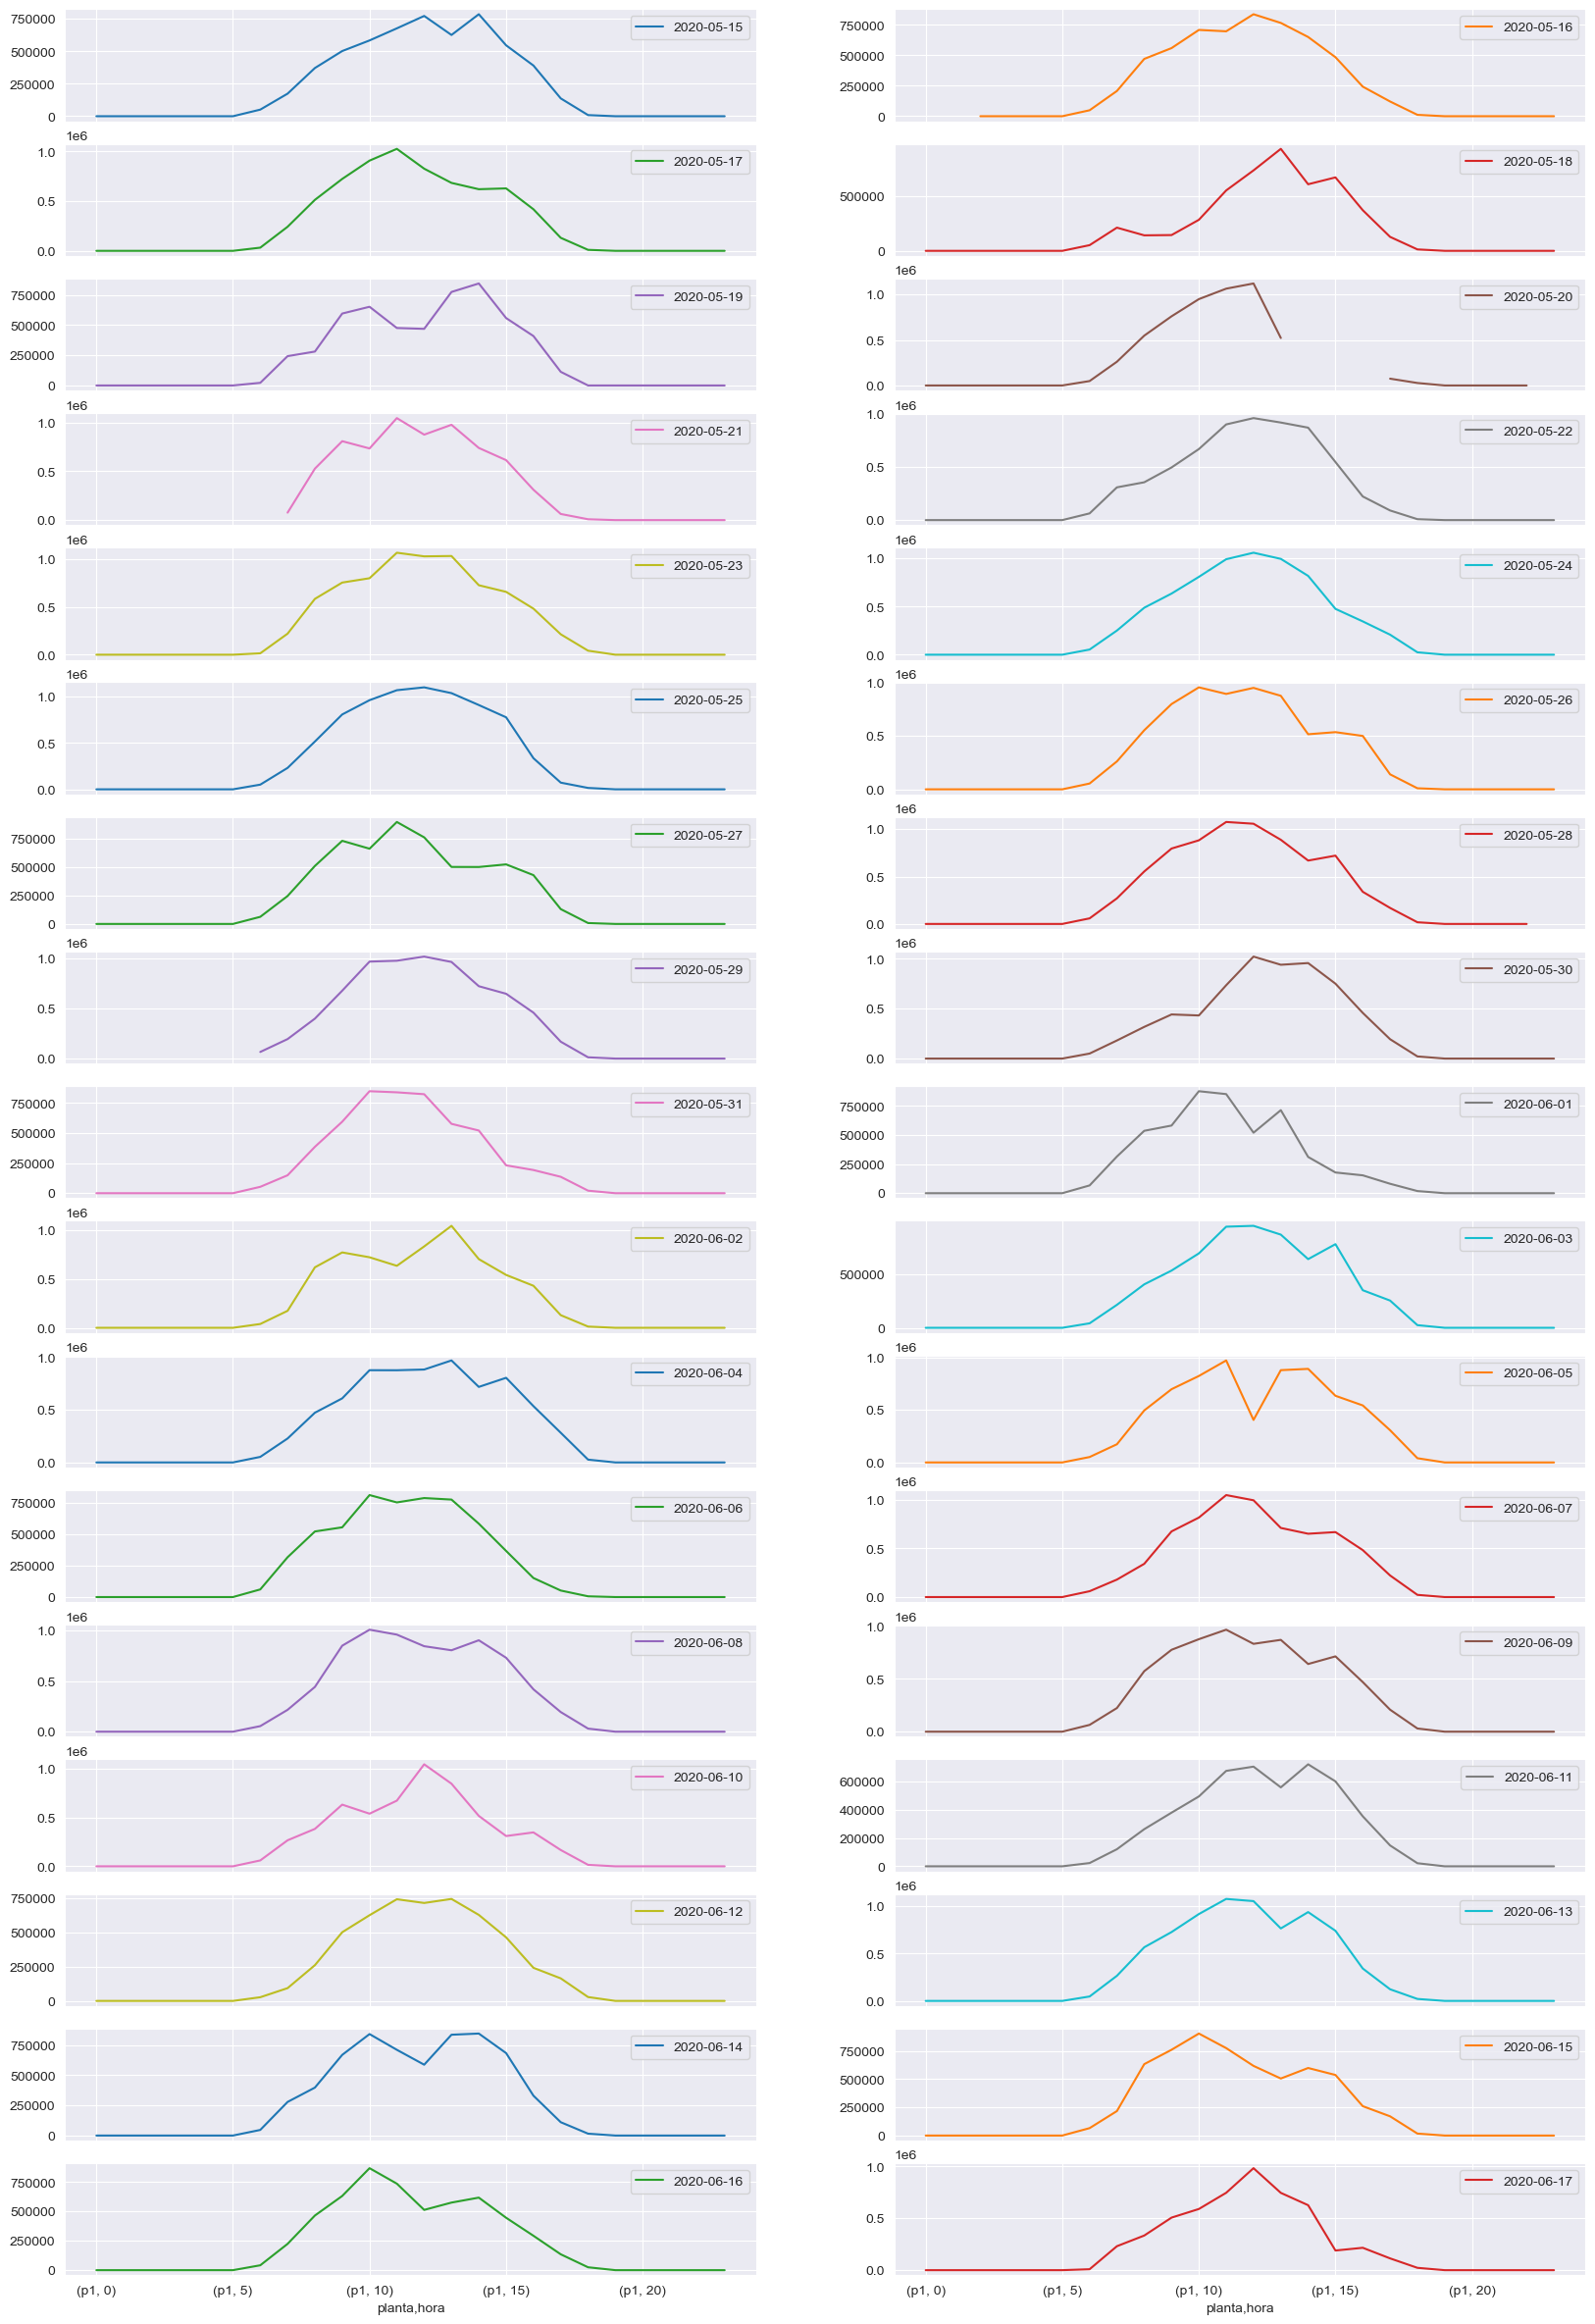

In [35]:
dc_hora_p1.unstack(level=1).plot(subplots=True, layout = (17,2), sharex=True, figsize=(20,30))
plt.savefig("Planta1_Generacion DC diaria")
; 

Conclusiones:

- En la planta 1 sí se mantienen unos patrones similares durante todos los días
- A excepción de un parón el día 20 de Mayo y una caída extraña el 19 de mayo y 05 de Junio
- Pero ninguna parece ser estructural
- Por tanto aunque cada día pudiera tener diferentes totales de producción los patrones intradía son similares y parecen correctos
- Habría que investigar en cada uno de esos días que ha podido pasar 


**Analisis de la cantidad de energía dc se ha generado en la planta 2 cada día por horas**

In [36]:
dc_hora_p2 = df[df.planta=="p2"].groupby(["planta","date", "hora"])["kw_dc"].sum()
dc_hora_p2.head()

planta  date        hora
p2      2020-05-15  0                 0.00
                    1                 0.00
                    2                 0.00
                    3                 0.00
                    4                 0.00
Name: kw_dc, dtype: float64

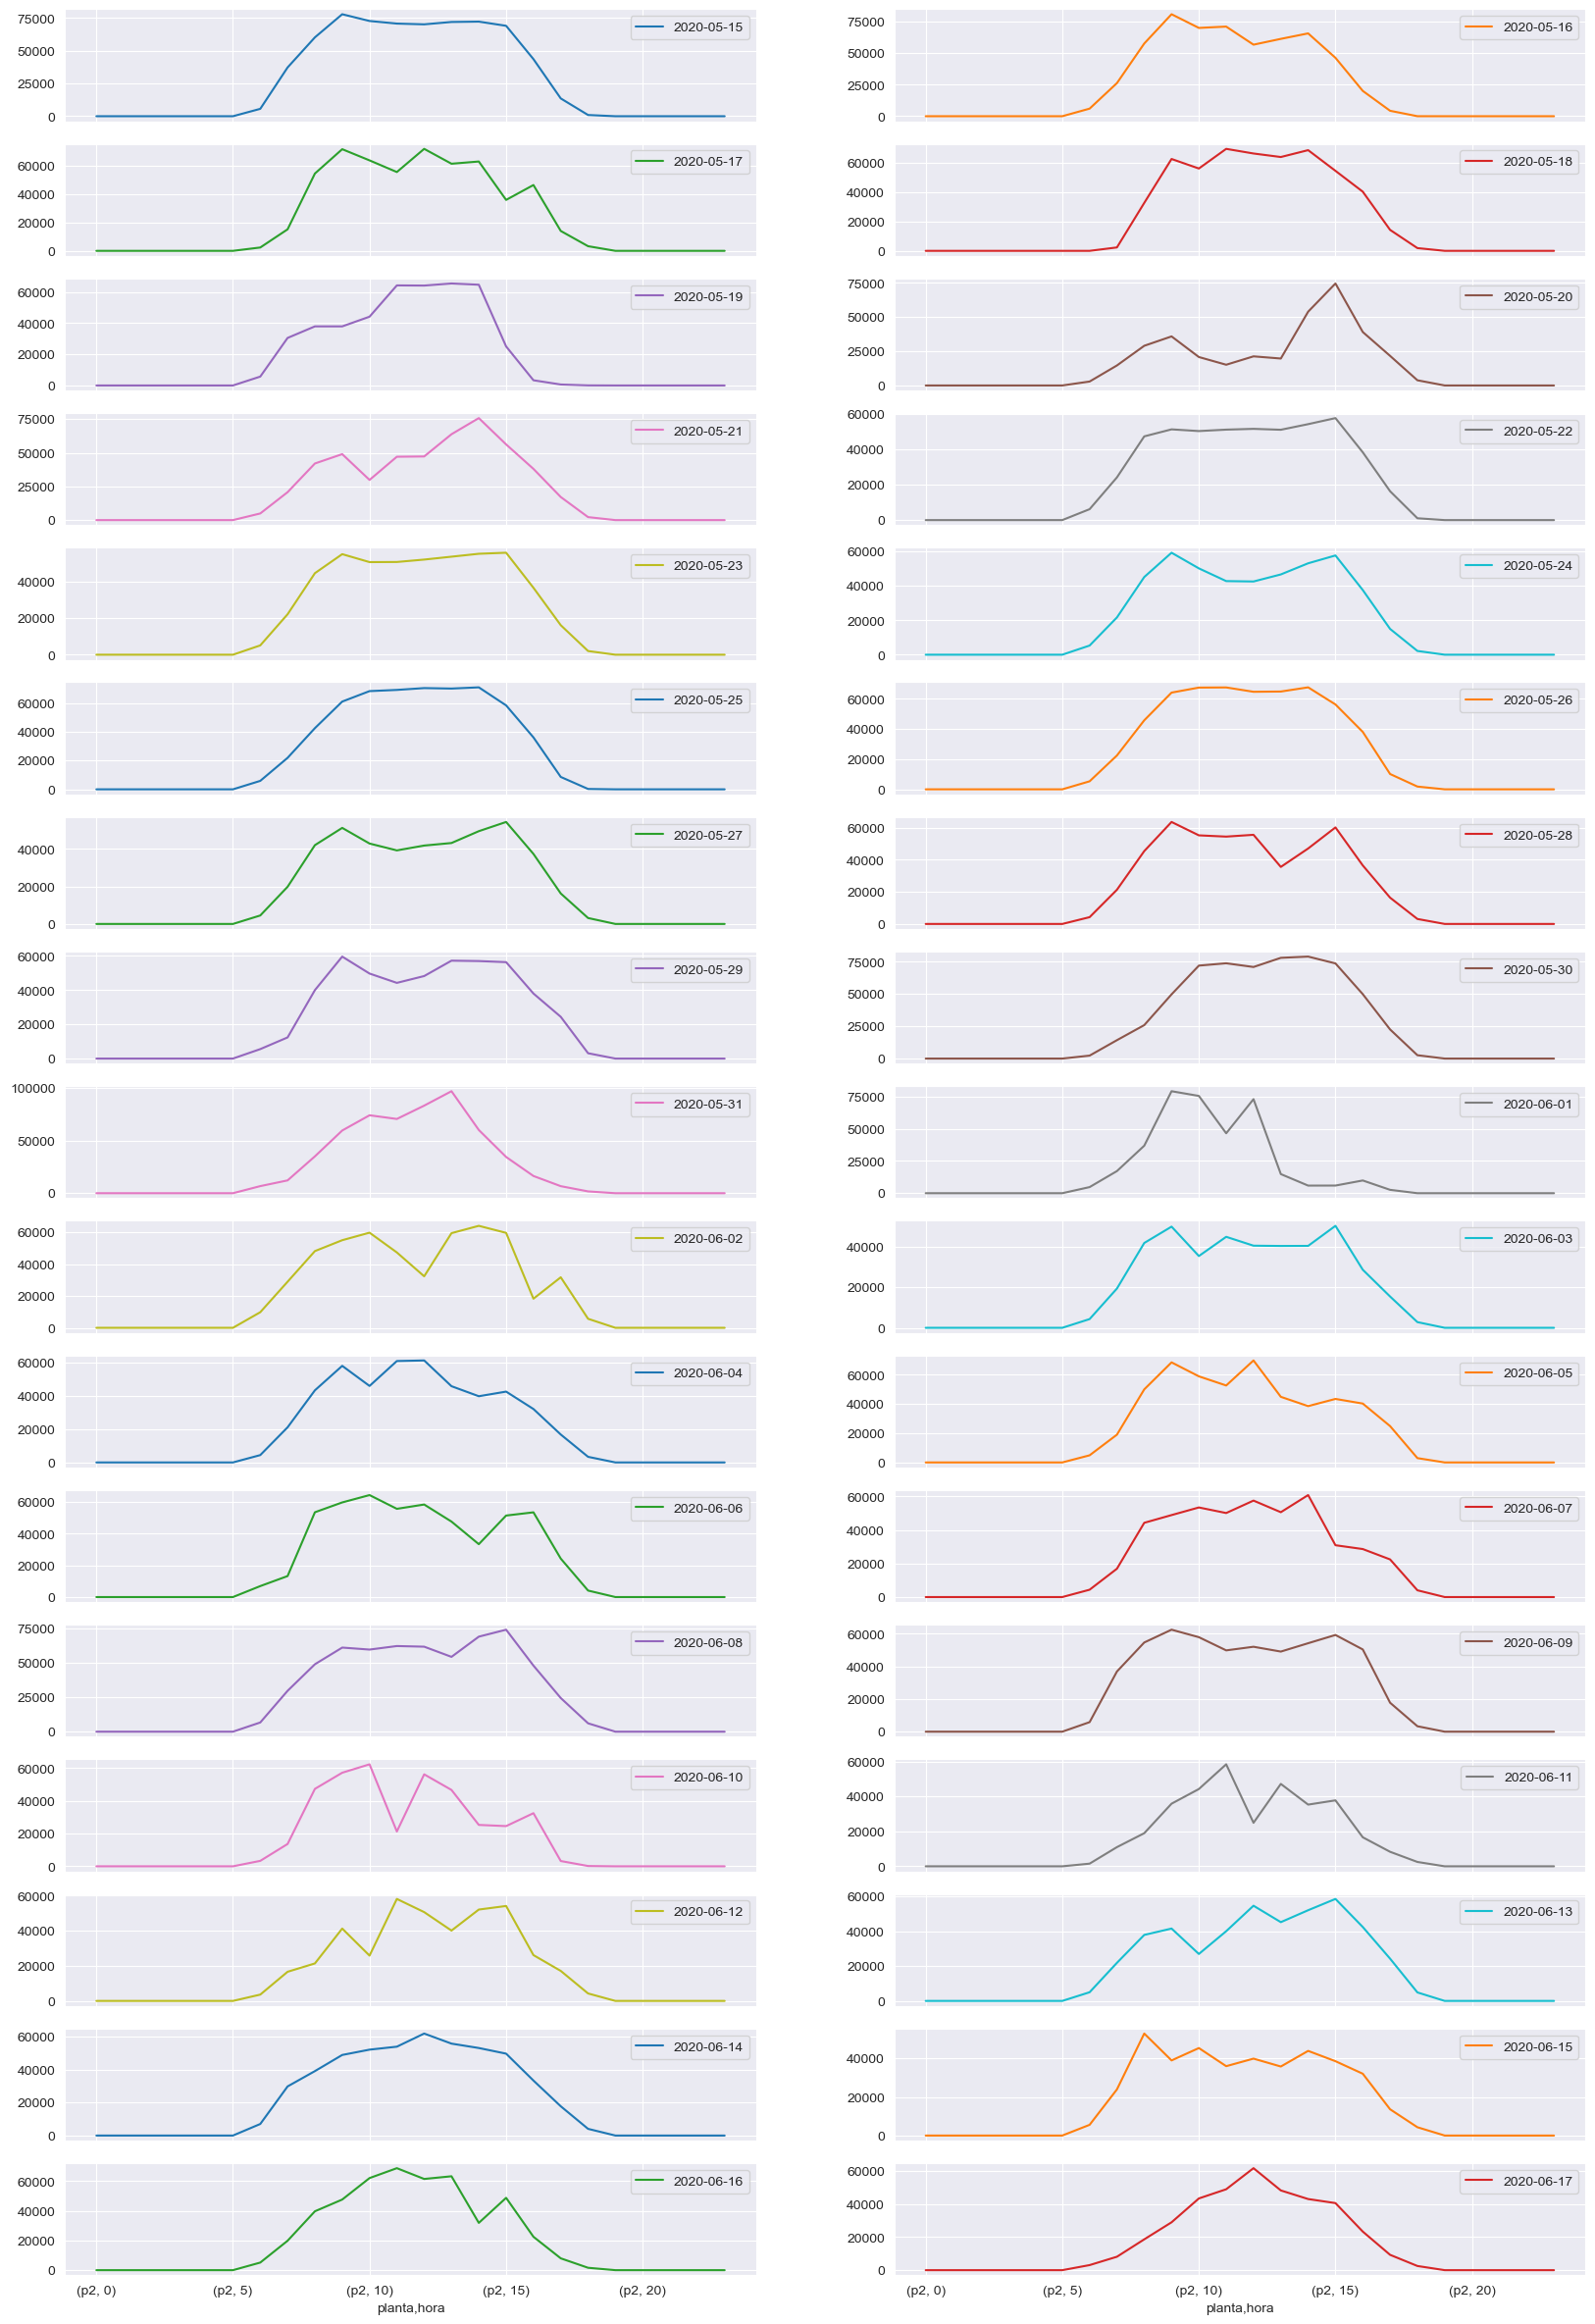

In [37]:
dc_hora_p2.unstack(level=1).plot(subplots=True, layout=(17,2), figsize=(20,30), sharex=True);

Conclusiones:

- De nuevo el día 20 de Mayo aparece con un comportamiento raro
- Los niveles de producción son constantes durante los días, pero siempre unas 10 veces por debajo de los nivels de la planta 1



**INSIGHT #2**: Los niveles bajos de la planta 2 son constantes y presentan unas curvas diarias que parecen normales.

Hasta Ahora: 
- Hemos analizado la irradiación y la energía solar que reciben ambas plantas y en ese punto no detectamos ningún problema, ambas plantas reciben suficiente y similar energía solar, por lo tanto a priori deberian tener un rendimiento similar.
  
- En cuanto a la generación de DC, la planta 1 con niveles muy superiores de generación de DC respecto a los de la planta 2. La planta 1 tiene una generación de DC muy alta y estable (con pequeñas observaciones puntuales). En la planta 2 la generación de energía DC es mucho menor pero también constante.

- Asumiendo que los datos son correctos, creemos que existe un problema estructural en la planta 2 de generación de DC

### Análisis de la transformación de energía DC en AC

In [114]:
df.head()


planta  mes  dia  hora  minuto        sensor_id     irradiacion  \
fecha                                                                        
2020-05-15     p1    5   15     0       0  HmiyD2TTLFNqkNe            0.00   
2020-05-15     p1    5   15     0       0  HmiyD2TTLFNqkNe            0.00   
2020-05-15     p1    5   15     0       0  HmiyD2TTLFNqkNe            0.00   
2020-05-15     p1    5   15     0       0  HmiyD2TTLFNqkNe            0.00   
2020-05-15     p1    5   15     0       0  HmiyD2TTLFNqkNe            0.00   

            temperatura_ambiente  temperatura_modulo      inverter_id  \
fecha                                                                   
2020-05-15                 25.18               22.86  1BY6WEcLGh8j5v7   
2020-05-15                 25.18               22.86  1IF53ai7Xc0U56Y   
2020-05-15                 25.18               22.86  3PZuoBAID5Wc2HD   
2020-05-15                 25.18               22.86  7JYdWkrLSPkdwr4   
2020-05-15                 25.18               22.86  McdE0feGgRqW7Ca   

                     kw_dc           kw_ac      eficiencia          kw_dia  \
fecha                                                                        
2020-05-15            0.00            0.00            0.00            0.00   
2020-05-15            0.00            0.00            0.00            0.00   
2020-05-15            0.00            0.00            0.00            0.00   
2020-05-15            0.00            0.00            0.00            0.00   
2020-05-15            0.00            0.00            0.00            0.00   

                  kw_total        date  
fecha                                   
2020-05-15      6259559.00  2020-05-15  
2020-05-15      6183645.00  2020-05-15  
2020-05-15      6987759.00  2020-05-15  
2020-05-15      7602960.00  2020-05-15  
2020-05-15      7158964.00  2020-05-15

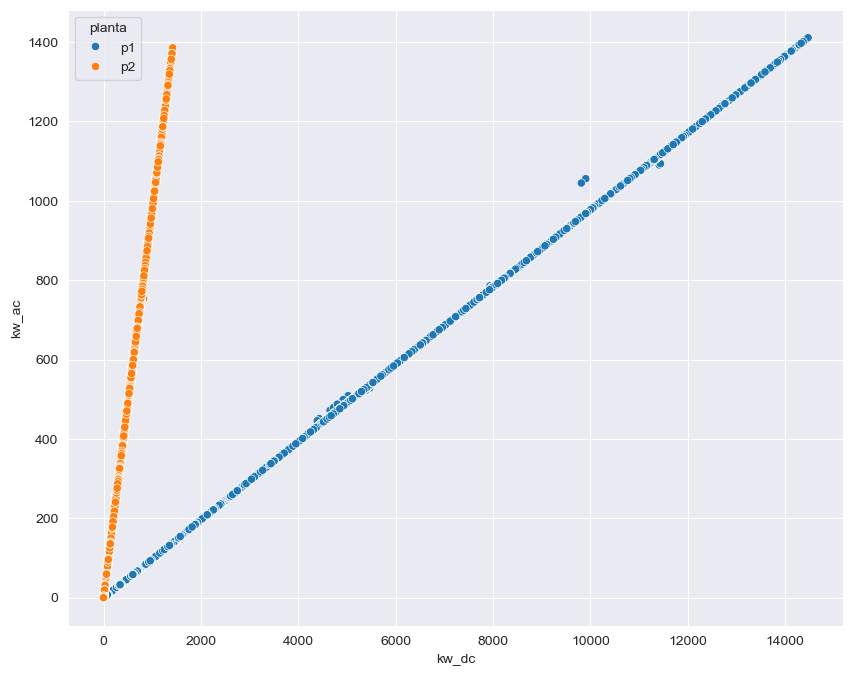

In [38]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="kw_dc", y="kw_ac", hue="planta");

- De nuevo los patrones son clarísimos: la planta 2 transforma la corriente de forma mucho más eficiente.

- Vamos a ampliar analizando la variable eficiencia que habíamos creado.

In [39]:
temp = df.groupby(["planta", "hora"], as_index=False)["eficiencia"].mean()
temp

planta  hora      eficiencia
0      p1     0            0.00
1      p1     1            0.00
2      p1     2            0.00
3      p1     3            0.00
4      p1     4            0.00
5      p1     5            0.00
6      p1     6            9.20
7      p1     7            9.80
8      p1     8            9.81
9      p1     9            9.78
10     p1    10            9.77
11     p1    11            9.75
12     p1    12            9.71
13     p1    13            9.68
14     p1    14            9.76
15     p1    15            9.79
16     p1    16            9.81
17     p1    17            9.76
18     p1    18            6.53
19     p1    19            0.00
20     p1    20            0.00
21     p1    21            0.00
22     p1    22            0.00
23     p1    23            0.00
24     p2     0            0.00
25     p2     1            0.00
26     p2     2            0.00
27     p2     3            0.00
28     p2     4            0.00
29     p2     5            0.58
30     p2     6           92.93
31     p2     7           97.39
32     p2     8           97.42
33     p2     9           91.70
34     p2    10           76.20
35     p2    11           68.35
36     p2    12           68.16
37     p2    13           73.04
38     p2    14           83.43
39     p2    15           95.69
40     p2    16           95.85
41     p2    17           95.56
42     p2    18           73.52
43     p2    19            0.00
44     p2    20            0.00
45     p2    21            0.00
46     p2    22            0.00
47     p2    23            0.00

In [40]:
sns.lineplot(data=temp, x="hora", y="eficiencia", hue="planta");

**INSIGHT #3**

La planta 1 tiene una capacidad de transformar DC a AC muy baja, lo cual sugiere problemas con los inverters

Otras conclusiones:

* Entrar en el detalle de los inverters de la planta 1, a ver si son todos o hay algunos que sesgan la media
* Revisar por qué la planta 2 pierde eficiencia durante las horas de más irradiación

Vamos a empezar por la segunda, comparando la producción de DC con la de AC en la planta 2.

In [41]:
df[df.planta=="p2"]

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 00:00:00     p2    5   15     0       0  iq8k7ZNt4Mwm3w0   
2020-05-15 00:00:00     p2    5   15     0       0  iq8k7ZNt4Mwm3w0   
2020-05-15 00:00:00     p2    5   15     0       0  iq8k7ZNt4Mwm3w0   
2020-05-15 00:00:00     p2    5   15     0       0  iq8k7ZNt4Mwm3w0   
2020-05-15 00:00:00     p2    5   15     0       0  iq8k7ZNt4Mwm3w0   
...                    ...  ...  ...   ...     ...              ...   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   

                        irradiacion  temperatura_ambiente  temperatura_modulo  \
fecha                                                                           
2020-05-15 00:00:00            0.00                 27.00               25.06   
2020-05-15 00:00:00            0.00                 27.00               25.06   
2020-05-15 00:00:00            0.00                 27.00               25.06   
2020-05-15 00:00:00            0.00                 27.00               25.06   
2020-05-15 00:00:00            0.00                 27.00               25.06   
...                             ...                   ...                 ...   
2020-06-17 23:45:00            0.00                 23.20               22.54   
2020-06-17 23:45:00            0.00                 23.20               22.54   
2020-06-17 23:45:00            0.00                 23.20               22.54   
2020-06-17 23:45:00            0.00                 23.20               22.54   
2020-06-17 23:45:00            0.00                 23.20               22.54   

                         inverter_id           kw_dc           kw_ac  \
fecha                                                                  
2020-05-15 00:00:00  4UPUqMRk7TRMgml            0.00            0.00   
2020-05-15 00:00:00  81aHJ1q11NBPMrL            0.00            0.00   
2020-05-15 00:00:00  9kRcWv60rDACzjR            0.00            0.00   
2020-05-15 00:00:00  Et9kgGMDl729KT4            0.00            0.00   
2020-05-15 00:00:00  IQ2d7wF4YD8zU1Q            0.00            0.00   
...                              ...             ...             ...   
2020-06-17 23:45:00  q49J1IKaHRwDQnt            0.00            0.00   
2020-06-17 23:45:00  rrq4fwE8jgrTyWY            0.00            0.00   
2020-06-17 23:45:00  vOuJvMaM2sgwLmb            0.00            0.00   
2020-06-17 23:45:00  xMbIugepa2P7lBB            0.00            0.00   
2020-06-17 23:45:00  xoJJ8DcxJEcupym            0.00            0.00   

                         eficiencia          kw_dia        kw_total  \
fecha                                                                 
2020-05-15 00:00:00            0.00         9425.00      2429011.00   
2020-05-15 00:00:00            0.00            0.00   1215278736.00   
2020-05-15 00:00:00            0.00         3075.33   2247719577.00   
2020-05-15 00:00:00            0.00          269.93      1704250.00   
2020-05-15 00:00:00            0.00         3177.00     19941526.00   
...                             ...             ...             ...   
2020-06-17 23:45:00            0.00         4157.00       520758.00   
2020-06-17 23:45:00            0.00         3931.00    121131356.00   
2020-06-17 23:45:00            0.00         4322.00      2427691.00   
2020-06-17 23:45:00            0.00         4218.00    106896394.00   
2020-06-17 23:45:00            0.00         4316.00    209335741.00   

                           date  
fecha                            
2020-05-15 00:00:00  2020-05-15  
2020-05-15 00:00:00  2020-05-15  
2020-05-15 00:00:00  2020-05-15  
2020-05-15 

In [42]:
temp  = df[["planta", "hora", "kw_dc", "kw_ac"]].melt(id_vars = ["planta", "hora"])
temp

planta  hora variable           value
0          p1     0    kw_dc            0.00
1          p1     0    kw_dc            0.00
2          p1     0    kw_dc            0.00
3          p1     0    kw_dc            0.00
4          p1     0    kw_dc            0.00
...       ...   ...      ...             ...
272939     p2    23    kw_ac            0.00
272940     p2    23    kw_ac            0.00
272941     p2    23    kw_ac            0.00
272942     p2    23    kw_ac            0.00
272943     p2    23    kw_ac            0.00

[272944 rows x 4 columns]

In [120]:
sns.lineplot(data = temp[temp.planta=="p2"], x="hora", y="value", hue="variable", ci=False);

Vemos que efectivamente en las horas centrales hay pérdida de eficiencia. Pero ni cerca de la pérdida que habíamos visto en el análisis anterior.

Vamos a analizar la distribución de la eficiencia en esas horas.

In [43]:
temp = df.between_time("08:00:00", "15:00:00")
temp = temp[temp.planta=="p2"]
temp


planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
...                    ...  ...  ...   ...     ...              ...   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   

                        irradiacion  temperatura_ambiente  temperatura_modulo  \
fecha                                                                           
2020-05-15 08:00:00            0.46                 27.68               35.71   
2020-05-15 08:00:00            0.46                 27.68               35.71   
2020-05-15 08:00:00            0.46                 27.68               35.71   
2020-05-15 08:00:00            0.46                 27.68               35.71   
2020-05-15 08:00:00            0.46                 27.68               35.71   
...                             ...                   ...                 ...   
2020-06-17 15:00:00            0.36                 27.23               29.35   
2020-06-17 15:00:00            0.36                 27.23               29.35   
2020-06-17 15:00:00            0.36                 27.23               29.35   
2020-06-17 15:00:00            0.36                 27.23               29.35   
2020-06-17 15:00:00            0.36                 27.23               29.35   

                         inverter_id           kw_dc           kw_ac  \
fecha                                                                  
2020-05-15 08:00:00  4UPUqMRk7TRMgml          581.05          569.41   
2020-05-15 08:00:00  81aHJ1q11NBPMrL          534.67          524.09   
2020-05-15 08:00:00  9kRcWv60rDACzjR          568.53          557.16   
2020-05-15 08:00:00  Et9kgGMDl729KT4          526.24          515.83   
2020-05-15 08:00:00  IQ2d7wF4YD8zU1Q          578.17          566.58   
...                              ...             ...             ...   
2020-06-17 15:00:00  q49J1IKaHRwDQnt          562.34          551.13   
2020-06-17 15:00:00  rrq4fwE8jgrTyWY          534.27          523.71   
2020-06-17 15:00:00  vOuJvMaM2sgwLmb          578.85          567.15   
2020-06-17 15:00:00  xMbIugepa2P7lBB          568.86          557.49   
2020-06-17 15:00:00  xoJJ8DcxJEcupym          578.49          566.90   

                         eficiencia          kw_dia        kw_total  \
fecha                                                                 
2020-05-15 08:00:00           98.00          554.00      2429565.00   
2020-05-15 08:00:00           98.02          516.60   1215279252.60   
2020-05-15 08:00:00           98.00          551.80   2247720128.80   
2020-05-15 08:00:00           98.02          503.00      1704753.00   
2020-05-15 08:00:00           97.99          552.79     19942078.79   
...                             ...             ...             ...   
2020-06-17 15:00:00           98.01         3380.87       519981.87   
2020-06-17 15:00:00           98.02         3190.40    121130615.40   
2020-06-17 15:00:00           97.98         3534.07      2426903.07   
2020-06-17 15:00:00           98.00         3433.50    106895609.50   
2020-06-17 15:00:00           98.00         3534.67    209334959.67   

                           date  
fecha                            
2020-05-15 08:00:00  2020-05-15  
2020-05-15 08:00:00  2020-05-15  
2020-05-15 08:00:00  2020-05-15  
2020-05-15 

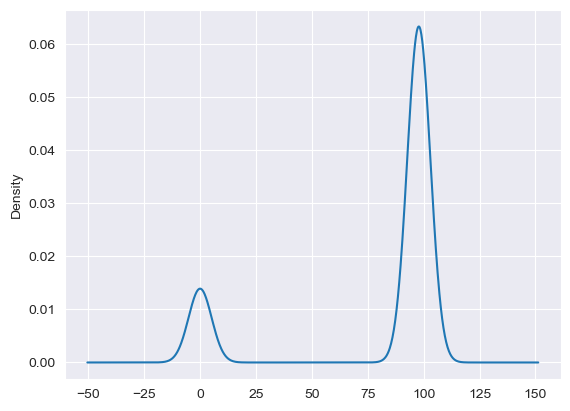

In [44]:
temp.eficiencia.plot.density();

Hay un conjunto de datos con eficiencia cero, y es lo que genera el problema. ¿Pero cual es la causa de esa eficiencia cero?

Vamos a seleccionar esos casos y revisarlos.

In [45]:
temp[temp.kw_dc==0]

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 09:45:00     p2    5   15     9      45  iq8k7ZNt4Mwm3w0   
2020-05-15 09:45:00     p2    5   15     9      45  iq8k7ZNt4Mwm3w0   
2020-05-15 09:45:00     p2    5   15     9      45  iq8k7ZNt4Mwm3w0   
2020-05-15 09:45:00     p2    5   15     9      45  iq8k7ZNt4Mwm3w0   
2020-05-15 10:00:00     p2    5   15    10       0  iq8k7ZNt4Mwm3w0   
...                    ...  ...  ...   ...     ...              ...   
2020-06-16 14:30:00     p2    6   16    14      30  iq8k7ZNt4Mwm3w0   
2020-06-16 14:30:00     p2    6   16    14      30  iq8k7ZNt4Mwm3w0   
2020-06-16 14:30:00     p2    6   16    14      30  iq8k7ZNt4Mwm3w0   
2020-06-16 14:30:00     p2    6   16    14      30  iq8k7ZNt4Mwm3w0   
2020-06-16 14:30:00     p2    6   16    14      30  iq8k7ZNt4Mwm3w0   

                        irradiacion  temperatura_ambiente  temperatura_modulo  \
fecha                                                                           
2020-05-15 09:45:00            0.80                 31.38               45.72   
2020-05-15 09:45:00            0.80                 31.38               45.72   
2020-05-15 09:45:00            0.80                 31.38               45.72   
2020-05-15 09:45:00            0.80                 31.38               45.72   
2020-05-15 10:00:00            0.83                 31.89               46.13   
...                             ...                   ...                 ...   
2020-06-16 14:30:00            0.56                 30.83               44.38   
2020-06-16 14:30:00            0.56                 30.83               44.38   
2020-06-16 14:30:00            0.56                 30.83               44.38   
2020-06-16 14:30:00            0.56                 30.83               44.38   
2020-06-16 14:30:00            0.56                 30.83               44.38   

                         inverter_id           kw_dc           kw_ac  \
fecha                                                                  
2020-05-15 09:45:00  81aHJ1q11NBPMrL            0.00            0.00   
2020-05-15 09:45:00  Et9kgGMDl729KT4            0.00            0.00   
2020-05-15 09:45:00  Quc1TzYxW2pYoWX            0.00            0.00   
2020-05-15 09:45:00  xoJJ8DcxJEcupym            0.00            0.00   
2020-05-15 10:00:00  81aHJ1q11NBPMrL            0.00            0.00   
...                              ...             ...             ...   
2020-06-16 14:30:00  q49J1IKaHRwDQnt            0.00            0.00   
2020-06-16 14:30:00  rrq4fwE8jgrTyWY            0.00            0.00   
2020-06-16 14:30:00  vOuJvMaM2sgwLmb            0.00            0.00   
2020-06-16 14:30:00  xMbIugepa2P7lBB            0.00            0.00   
2020-06-16 14:30:00  xoJJ8DcxJEcupym            0.00            0.00   

                         eficiencia          kw_dia        kw_total  \
fecha                                                                 
2020-05-15 09:45:00            0.00         1645.00   1215280381.00   
2020-05-15 09:45:00            0.00         1541.00      1705791.00   
2020-05-15 09:45:00            0.00         1324.00    329510409.00   
2020-05-15 09:45:00            0.00         1735.00    209145328.00   
2020-05-15 10:00:00            0.00         1645.00   1215280381.00   
...                             ...             ...             ...   
2020-06-16 14:30:00            0.00            0.00        34379.33   
2020-06-16 14:30:00            0.00            0.00      8075096.33   
2020-06-16 14:30:00            0.00            0.00       173022.79   
2020-06-16 14:30:00            0.00            0.00      7126074.93   
2020-06-16 14:30:00            0.00            0.00     13955359.33   

                           date  
fecha                            
2020-05-15 09:45:00  2020-05-15  
2020-05-15 09:45:00  2020-05-15  
2020-05-15 09:45:00  2020-05-15  
2020-05-15 

Parece que no es problema del inverter, si no de que en esos momentos no se ha generado DC.

Vamos a poner la condición de que DC > 0 y ver ahí cual es la eficiencia.

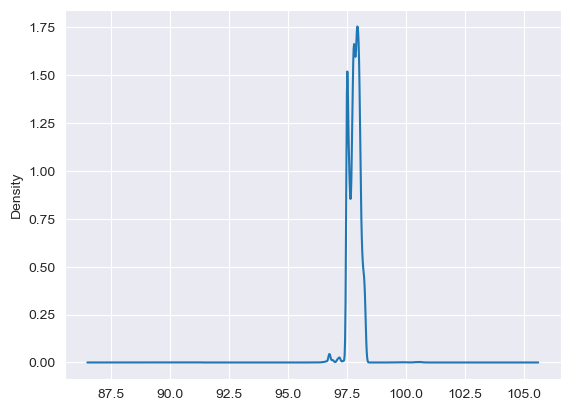

In [46]:
temp[temp.kw_dc>0].eficiencia.plot.density();

Efectivamente cuando hay DC la eficiencia es superior al 96%.

La pregunta entonces es ¿por qué no hay DC? ¿Hay algún patrón?

Vamos a crear un indicador de DC = 0 para poder analizarlo.

In [47]:
temp["kw_dc_cero"] = np.where(temp.kw_dc==0, 1, 0)

In [49]:
temp.head(20)

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   

                        irradiacion  temperatura_ambiente  temperatura_modulo  \
fecha                                                                           
2020-05-15 08:00:00            0.46                 27.68               35.71   
2020-05-15 08:00:00            0.46                 27.68               35.71   
2020-05-15 08:00:00            0.46                 27.68               35.71   
2020-05-15 08:00:00            0.46                 27.68               35.71   
2020-05-15 08:00:00            0.46                 27.68               35.71   
2020-05-15 08:00:00            0.46                 27.68               35.71   
2020-05-15 08:00:00            0.46                 27.68               35.71   
2020-05-15 08:00:00            0.46                 27.68               35.71   
2020-05-15 08:00:00            0.46                 27.68               35.71   
2020-05-15 08:00:00            0.46                 27.68               35.71   
2020-05-15 08:00:00            0.46                 27.68               35.71   
2020-05-15 08:00:00            0.46                 27.68               35.71   
2020-05-15 08:00:00            0.46                 27.68               35.71   
2020-05-15 08:00:00            0.46                 27.68               35.71   
2020-05-15 08:00:00            0.46                 27.68               35.71   
2020-05-15 08:00:00            0.46                 27.68               35.71   
2020-05-15 08:00:00            0.46                 27.68               35.71   
2020-05-15 08:00:00            0.46                 27.68               35.71   
2020-05-15 08:00:00            0.46                 27.68               35.71   
2020-05-15 08:00:00            0.46                 27.68               35.71   

                         inverter_id           kw_dc           kw_ac  \
fecha                                                                  
2020-05-15 08:00:00  4UPUqMRk7TRMgml          581.05          569.41   
2020-05-15 08:00:00  81aHJ1q11NBPMrL          534.67          524.09   
2020-05-15 08:00:00  9kRcWv60rDACzjR          568.53          557.16   
2020-05-15 08:00:00  Et9kgGMDl729KT4          526.24          515.83   
2020-05-15 08:00:00  IQ2d7wF4YD8zU1Q          578.17          566.58   
2020-05-15 08:00:00  LYwnQax7tkwH5Cb          570.37          558.97   
2020-05-15 08:00:00  LlT2YUhhzqhg5Sw          564.70          553.43   
2020-05-15 08:00:00  Mx2yZ

In [50]:
temp.groupby("kw_dc_cero")[["irradiacion", "temperatura_ambiente", "temperatura_modulo"]].mean()

irradiacion  temperatura_ambiente  temperatura_modulo
kw_dc_cero                                                          
0                     0.59                 30.48               44.32
1                     0.80                 32.48               52.03

Recordamos que los datos que estamos analizando ahora son los comprendidos entre las 8:00 y las 15:00, las horas con mayor irradiación. 

En la temperatura ambiente no hay mucha diferencia, pero en la del módulo y en la irradiación sí.

¿Podría ser que si se calienta demasiado el módulo deje de generar DC?

Vamos a verlo comparando la temperatura del módulo con la generación de DC.

In [51]:
sns.scatterplot(data=temp, x="temperatura_modulo", y = "kw_dc", hue="kw_dc_cero");

La hipótesis anterior no se confirma, ya que hay muchos casos de temperaturas altas donde se genera DC, y también de kw_dc igual a cero en casi todos los rangos de temperaturas.

Vamos a analizar ahora las categóricas, empezando por el inverter.

In [129]:
temp.groupby("inverter_id")[["kw_dc_cero"]].mean().sort_values(by="kw_dc_cero", ascending=False).plot.bar();

Existe gran diferencia en el porcentaje de producción cero de DC por inverter.

Desde algunos que tienen menos del 5% hasta algunos que superan el 30%.

Esto es relevante porque estamos mirando las horas de mayor irradiación, por lo que debería generarse dc

**INSIGHT #4:**: En la planta 2 existen varios inverters a los que no está llegando suficiente producción de DC, y por tanto cuyos módulos necesitan revisión.

Vamos a analizar los inverters desde el punto de vista de la eficiencia media para ver si hay "buenos y malos".

In [130]:
temp[temp.kw_dc_cero==0].groupby(["inverter_id", "date"], as_index=False).eficiencia.mean().boxplot(column="eficiencia", 
                                                                                                    by="inverter_id", 
                                                                                                   figsize=(14,10))
plt.xticks(rotation=90);

**INSIGHT #5:**: Una vez descontando el problema de la no generación de DC, los inverters de la planta 2 sí funcionan bien y hacen bien el trabajo de transformación a AC.

Para terminar de analizar la eficiencia de los inverters podemos ver su rendimiento en cada uno de los días para ver si han posido existir problemas puntuales

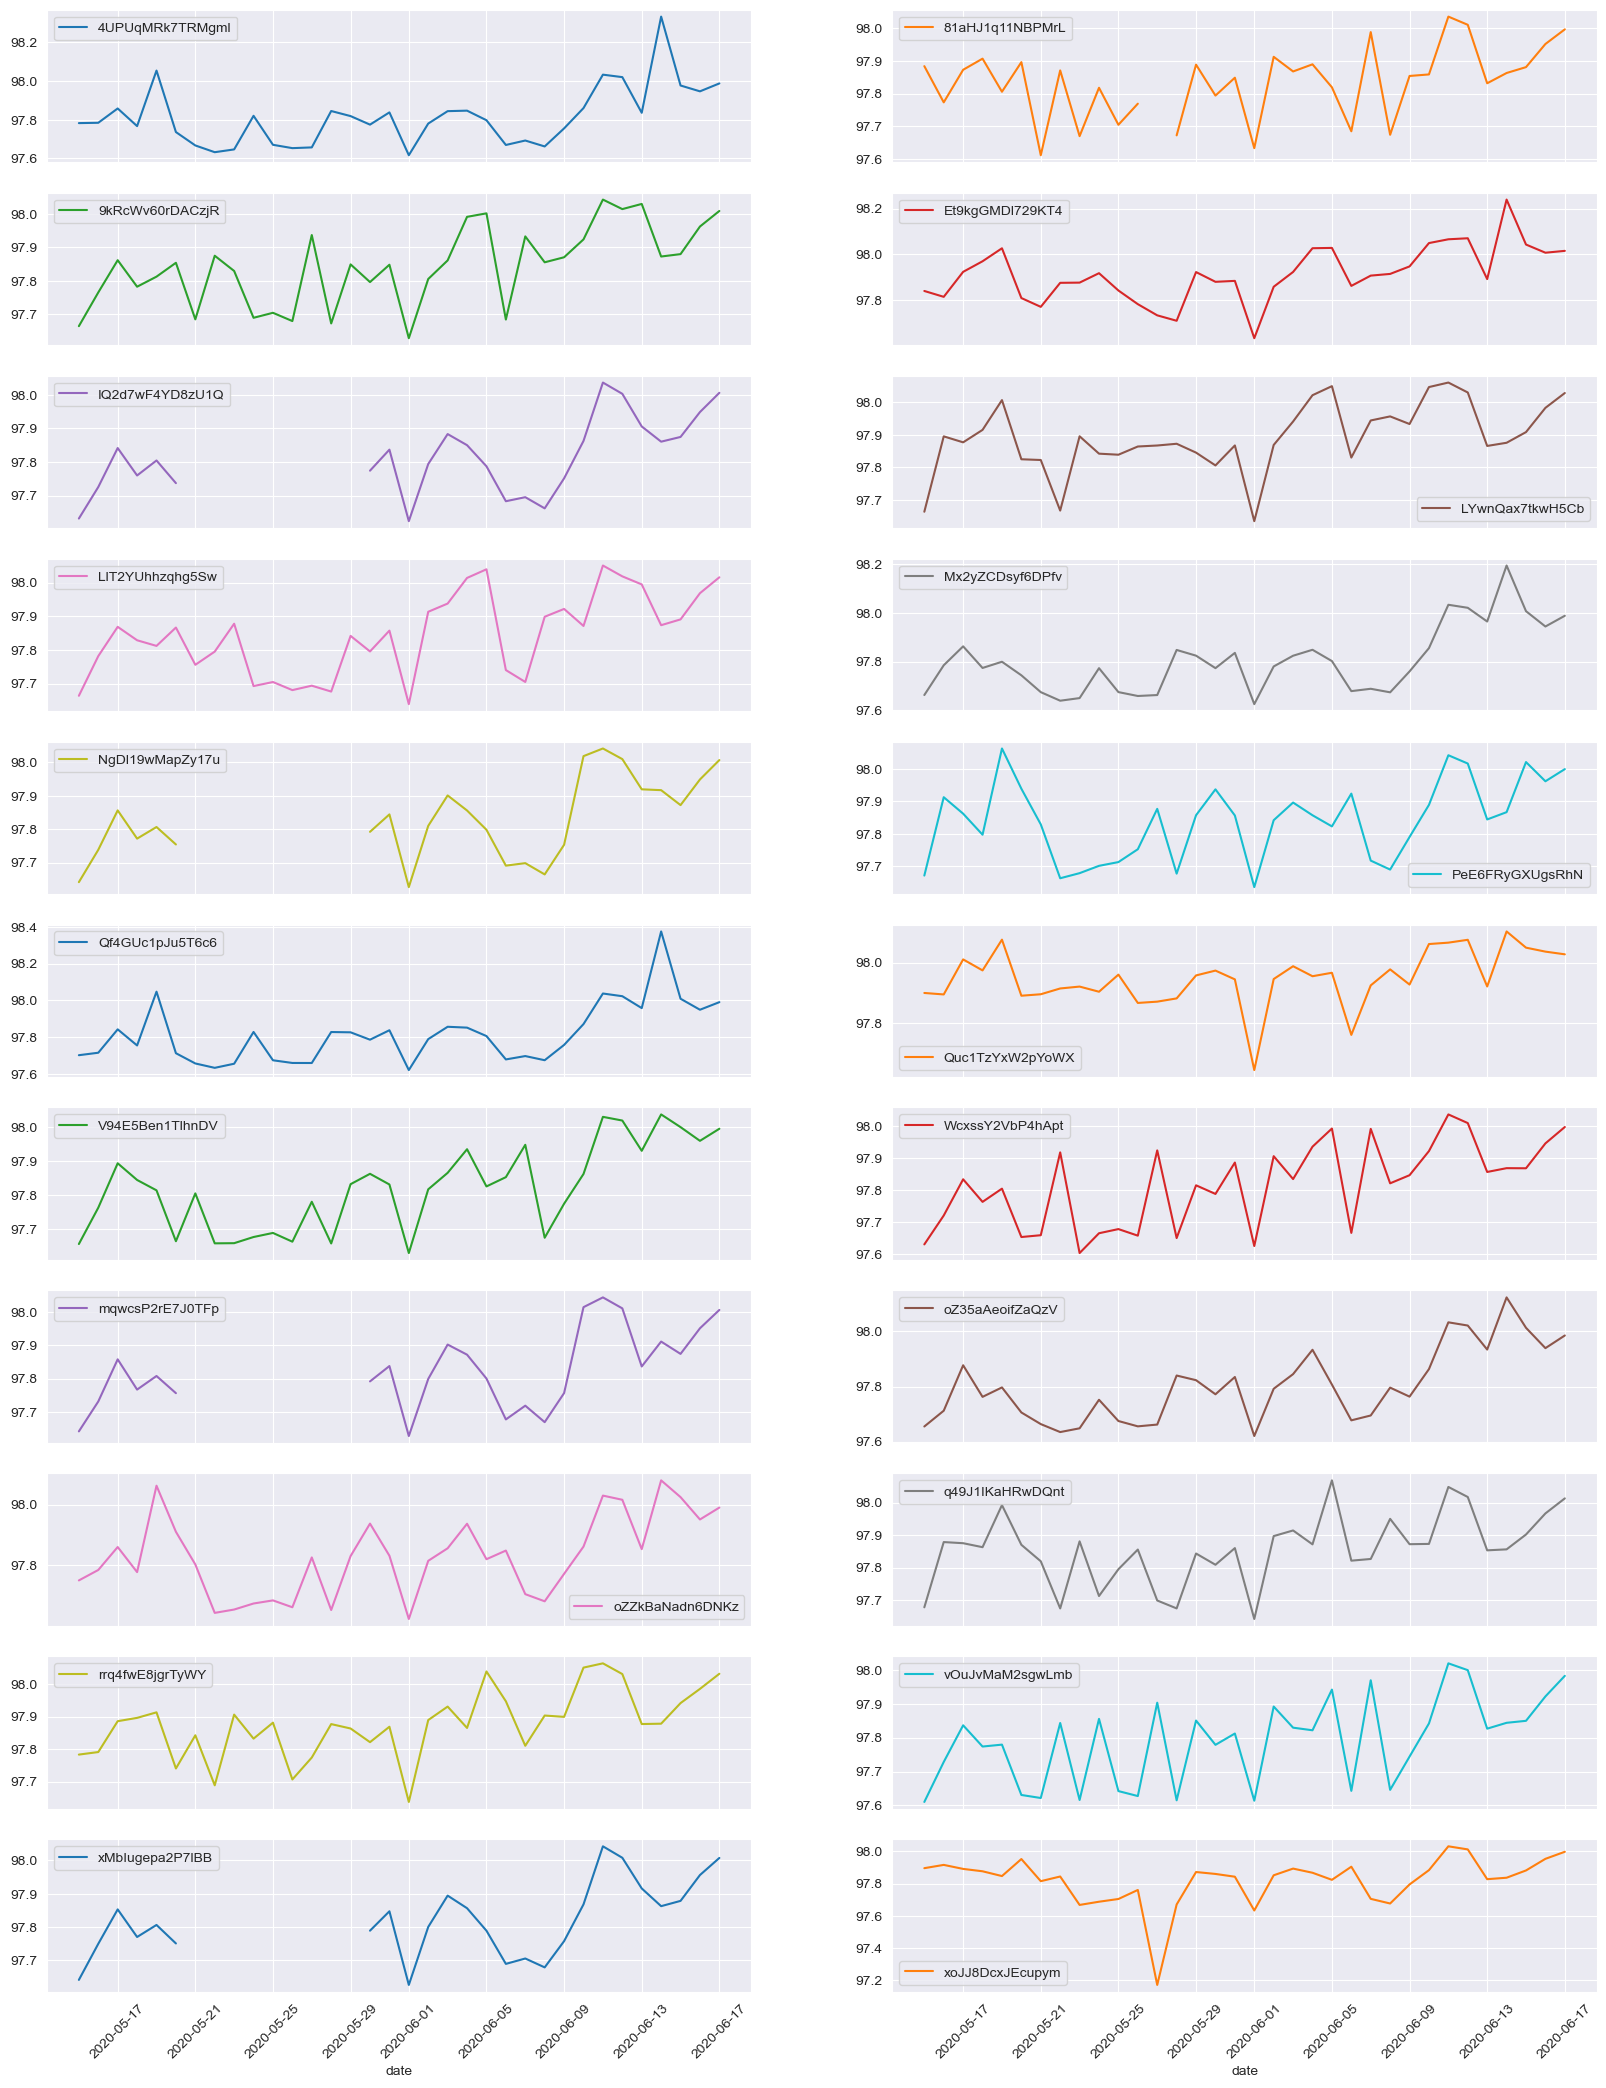

In [52]:
temp[temp.kw_dc_cero==0].groupby(["inverter_id", "date"]).eficiencia.mean().unstack(level=0).plot(subplots=True, 
                                                                                                 sharex=True,
                                                                                                  layout= (17,2),
                                                                                                 figsize=(20,40), 
                                                                                                 rot=45);


- Primer inverter: no ha tenido ningun fallo a lo largo del periodo, y siempre en escalas de eficiencia muy altas. 

- Segundo inverter: Problema en 2 o 3 dias

- Quinto inverter: Problema varios días 
    
- Noveno inverter: Problema varios días 
    
- Los problemas de eficiencia parece que son en la misma fecha 


### Repetimos el Análisis sobre la planta 1

In [53]:
temp = df[df.planta=="p1"].between_time("08:00:00", "15:00:00")
temp["kw_dc_cero"] = np.where(temp["kw_dc"]==0, 1, 0)
temp

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
...                    ...  ...  ...   ...     ...              ...   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   

                        irradiacion  temperatura_ambiente  temperatura_modulo  \
fecha                                                                           
2020-05-15 08:00:00            0.20                 25.42               31.41   
2020-05-15 08:00:00            0.20                 25.42               31.41   
2020-05-15 08:00:00            0.20                 25.42               31.41   
2020-05-15 08:00:00            0.20                 25.42               31.41   
2020-05-15 08:00:00            0.20                 25.42               31.41   
...                             ...                   ...                 ...   
2020-06-17 15:00:00            0.32                 28.62               39.95   
2020-06-17 15:00:00            0.32                 28.62               39.95   
2020-06-17 15:00:00            0.32                 28.62               39.95   
2020-06-17 15:00:00            0.32                 28.62               39.95   
2020-06-17 15:00:00            0.32                 28.62               39.95   

                         inverter_id           kw_dc           kw_ac  \
fecha                                                                  
2020-05-15 08:00:00  1BY6WEcLGh8j5v7         3246.00          318.67   
2020-05-15 08:00:00  1IF53ai7Xc0U56Y         2805.62          275.46   
2020-05-15 08:00:00  3PZuoBAID5Wc2HD         2736.12          268.62   
2020-05-15 08:00:00  7JYdWkrLSPkdwr4         2741.50          269.15   
2020-05-15 08:00:00  McdE0feGgRqW7Ca         3208.88          315.05   
...                              ...             ...             ...   
2020-06-17 15:00:00  uHbuxQJl8lW7ozc         4719.62          462.89   
2020-06-17 15:00:00  wCURE6d3bPkepu2         5077.75          497.80   
2020-06-17 15:00:00  z9Y9gH1T5YWrNuG         5113.00          501.29   
2020-06-17 15:00:00  zBIq5rxdHJRwDNY         4675.38          458.61   
2020-06-17 15:00:00  zVJPv84UY57bAof         4853.75          475.96   

                         eficiencia          kw_dia        kw_total  \
fecha                                                                 
2020-05-15 08:00:00            9.82          263.57      6259822.57   
2020-05-15 08:00:00            9.82          292.50      6183937.50   
2020-05-15 08:00:00            9.82          287.75      6988046.75   
2020-05-15 08:00:00            9.82          281.00      7603241.00   
2020-05-15 08:00:00            9.82          291.00      7159255.00   
...                             ...             ...             ...   
2020-06-17 15:00:00            9.81         5423.50      7286458.50   
2020-06-17 15:00:00            9.80         5343.75      7028061.75   
2020-06-17 15:00:00            9.80         5282.88      7250667.88   
2020-06-17 15:00:00            9.81         5284.75      6582836.75   
2020-06-17 15:00:00            9.81         5368.75      7362730.75   

                           date  kw_dc_cero  
fecha                                        
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0

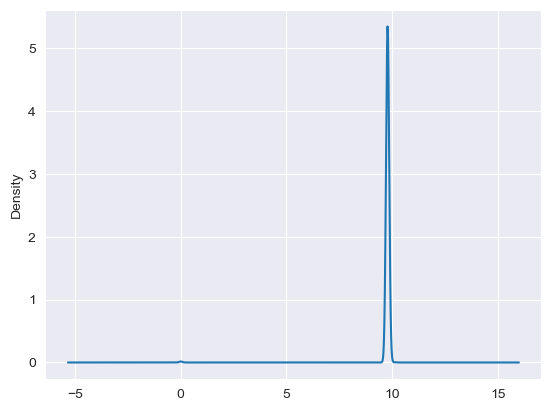

In [54]:
temp.eficiencia.plot.density();

Vemos que no, aquí todos los inverters tienen una eficiencia constante, en torno al 10% (aunque muy baja en comparación con la planta 2)

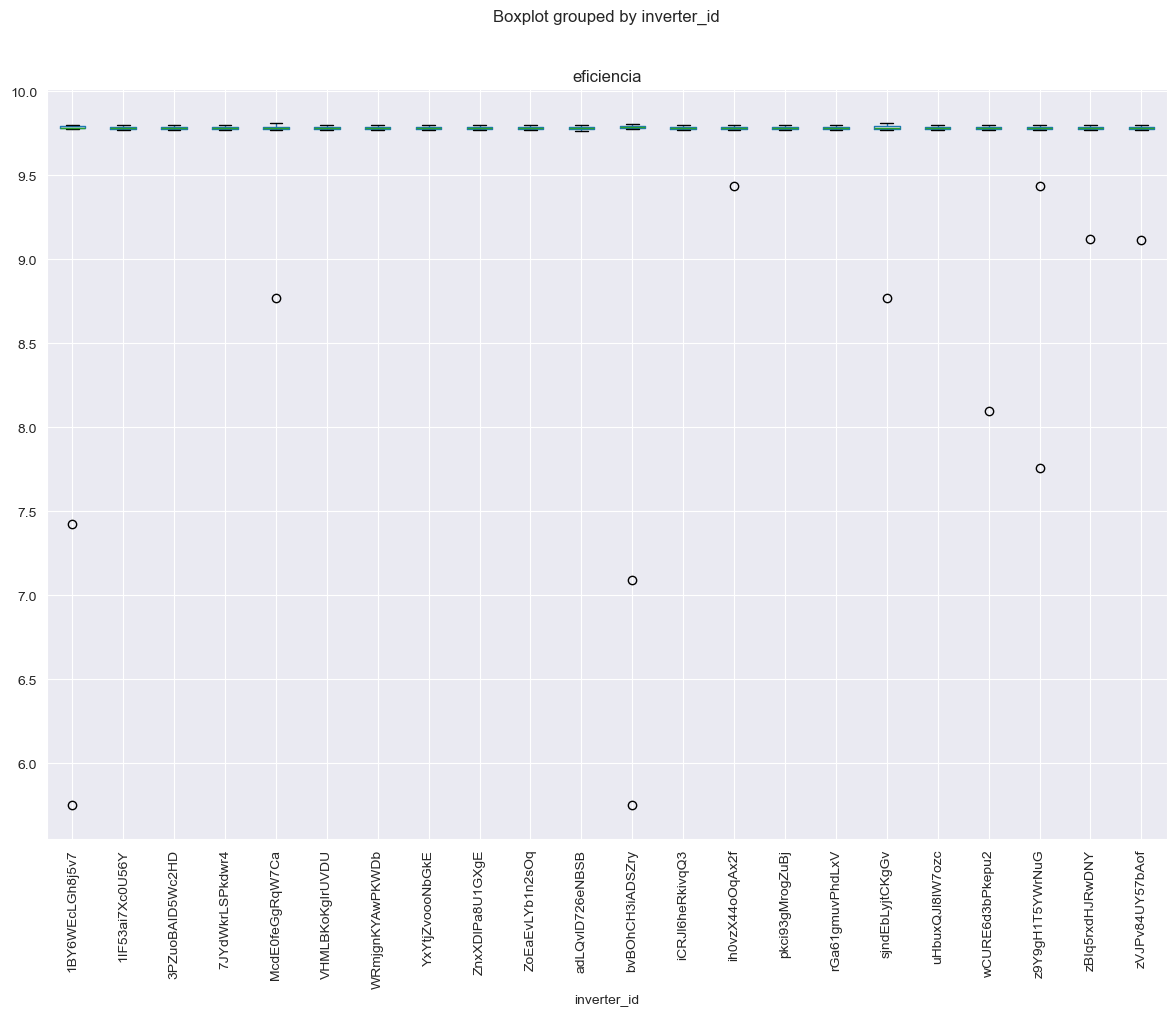

In [55]:
temp.groupby(["inverter_id", "date"], as_index=False).eficiencia.mean().boxplot(column="eficiencia",
                                                                                by="inverter_id", 
                                                                               figsize=(14,10))
plt.xticks(rotation=90);

Vemos que salvo días puntuales en algunos inverters en el resto la eficiencia es constante, pero muy baja. 

En la planta 1 no están funcionando los inverters, asumiendo que los datos son correctos. 

Vamos a revisar la eficiencia media diaria por cada inverter.

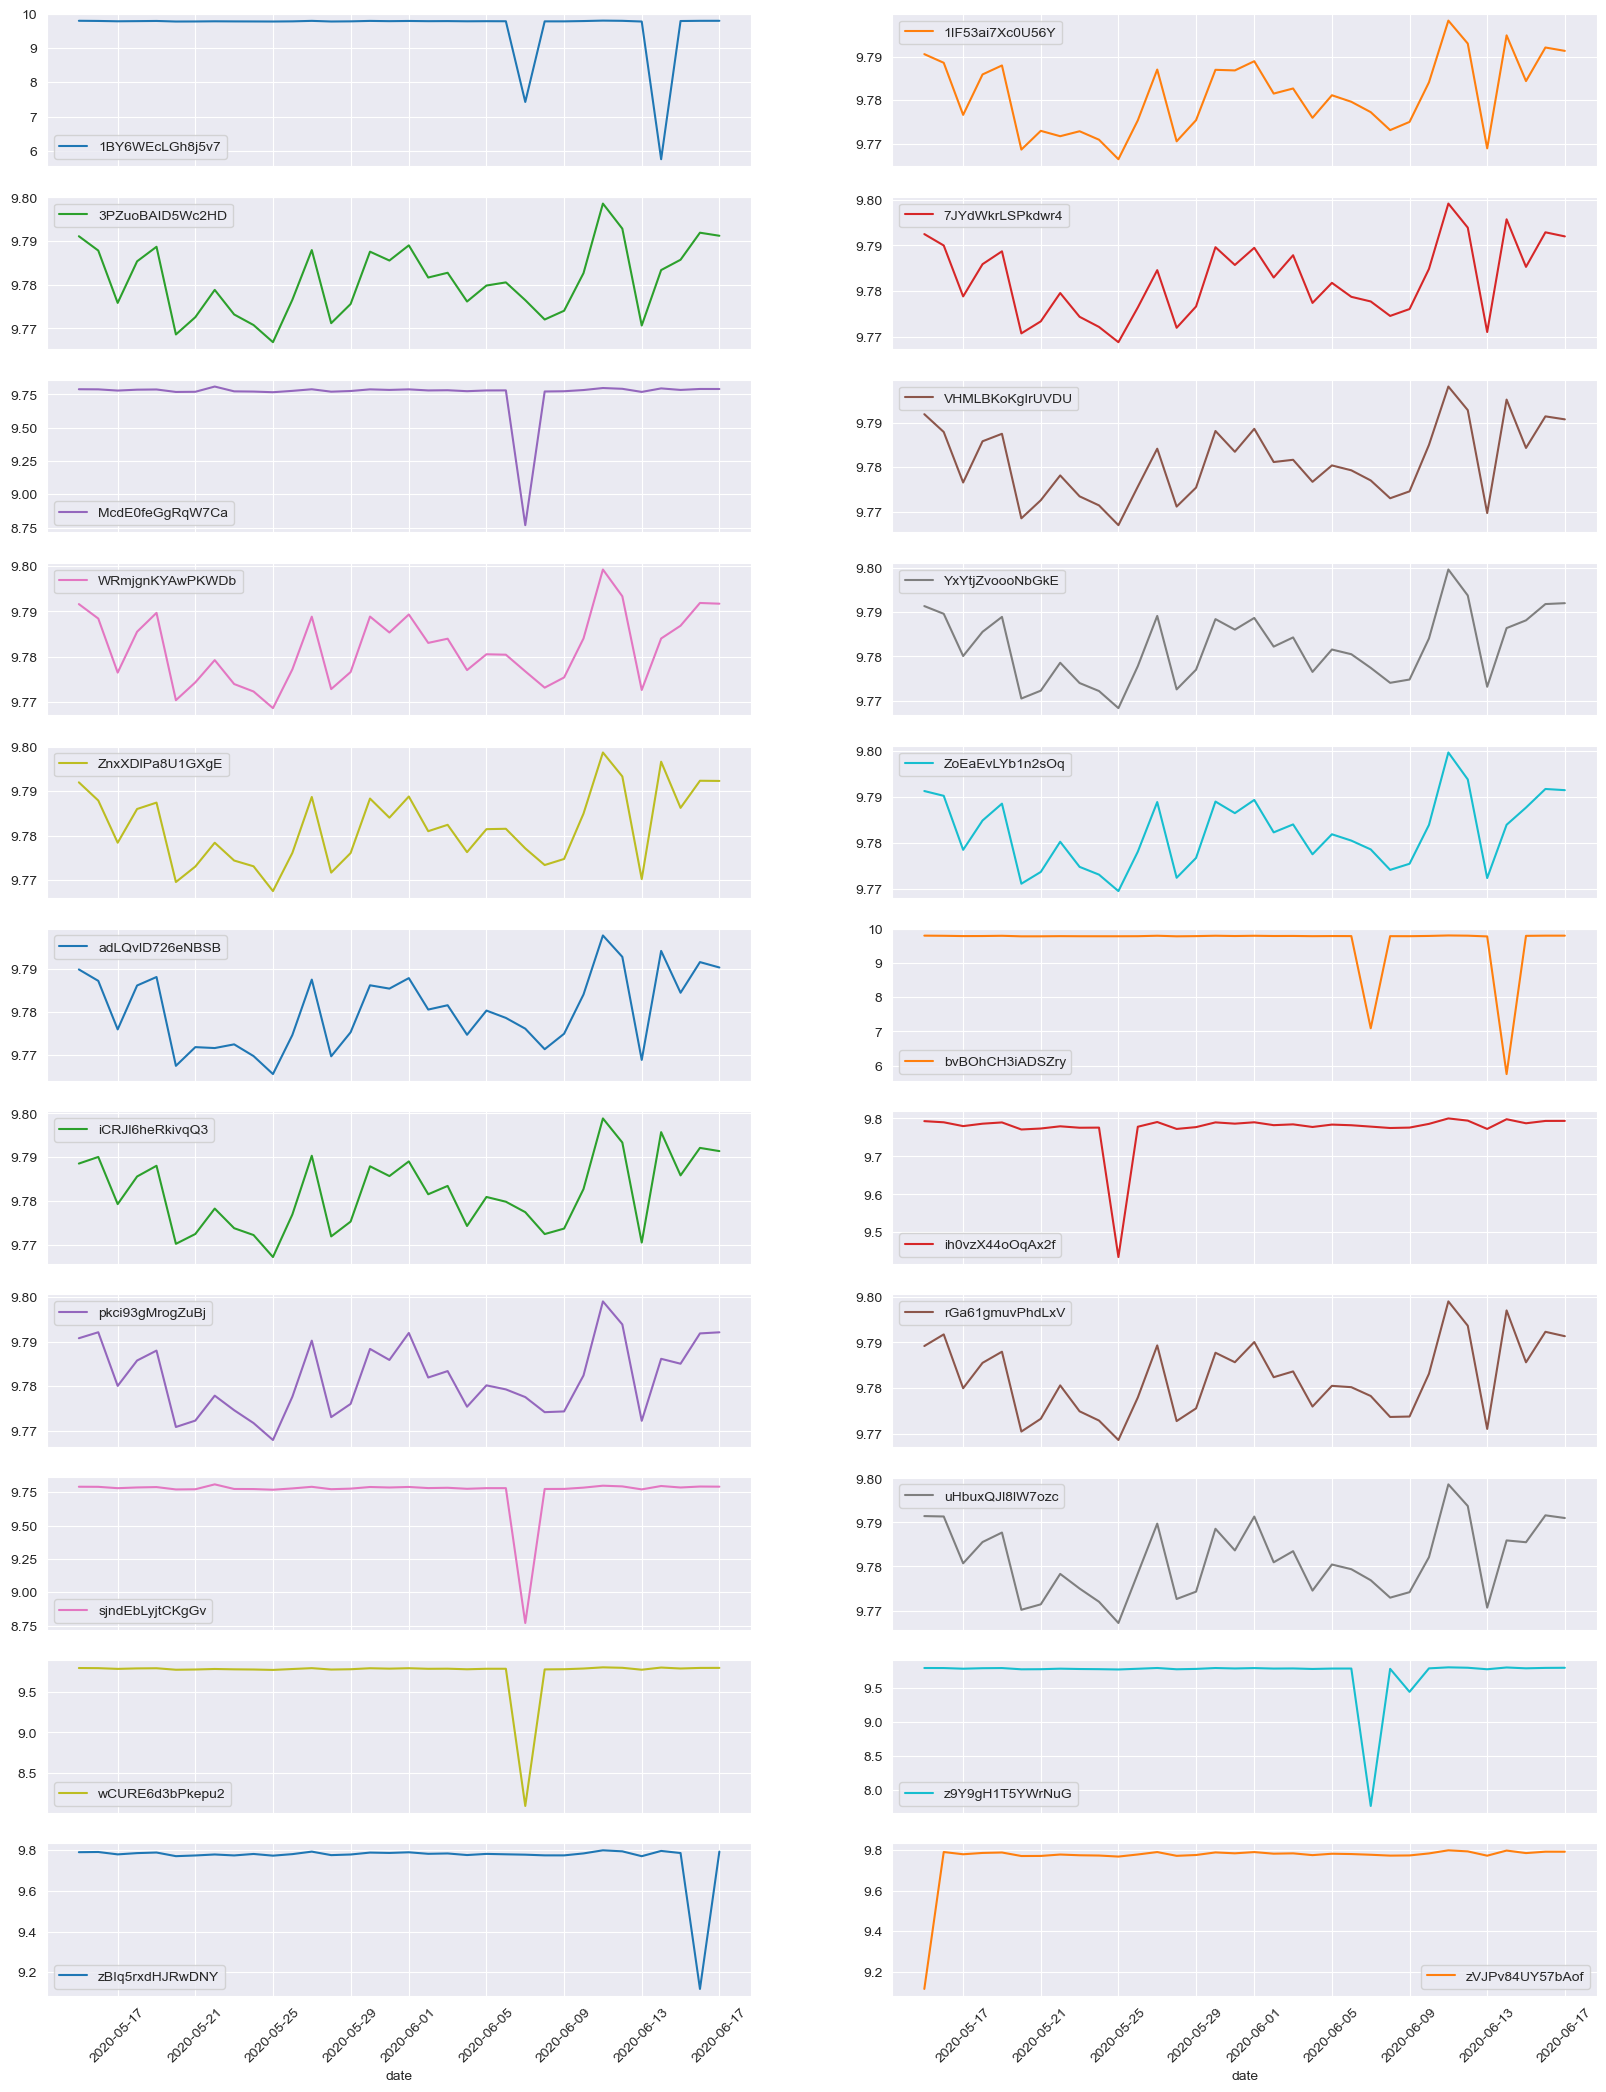

In [56]:
temp.groupby(["inverter_id", "date"]).eficiencia.mean().unstack(level=0).plot(subplots=True, 
                                                                             sharex=True, 
                                                                             figsize = (20,40), 
                                                                             layout=(17,2),
                                                                             rot=45);

En el análisis por inverter vemos de nuevo que todos los datos son constantes.

Vamos a comprobar que entonces no hay fallos en la generación de DC

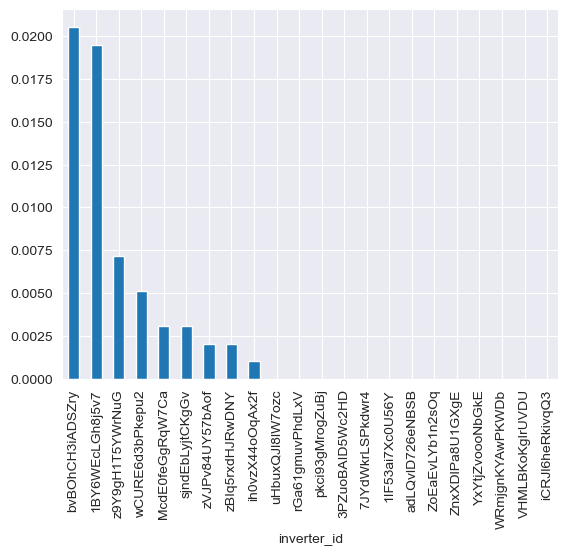

In [137]:
temp.groupby(["inverter_id"]).kw_dc_cero.mean().sort_values(ascending=False).plot.bar();

En las ventanas temporales de 15 minutos, dentro de la franja horaria de ocho a tres de la tarde, la mayoría de los inverters no han tenido ningún momento en los que no se hayan generado Kw de dc. 

Vemos que aunque hay algunos inverters que han tenido fallos su magnitud es inferior al 2% de las mediciones.

Por tanto la generación de DC en la planta 1 sí es correcta, y el fallo está en la transformación de DC a AC.

## CONCLUSIONES

Tras un análisis de los datos podemos concluir que:
    
* Existen graves problemas de calidad de datos. Se debería revisar en qué parte de la cadena se generan estos problemas, incluyendo los medidores de las plantas.
* El hecho de que la generación en DC sea unas 10 veces superior en la planta 1 que en la 2, sumado al hecho de que la eficiencia en la planta 1 esté sobre el 10% nos lleva a pensar que el dato de generación de DC en la planta 1 puede estar artificialmente escalado por algún motivo.
* Pero de momento a falta de comprobación vamos a asumir que los datos son correctos.
* La dos plantas han recibido altas cantidades de irradiación, no hemos localizado ningún problema en esta fase
* Aunque la temperatura ambiente es superior en la planta 2 y sus módulos se calientan más que los de la planta 1 esto no parece tener un impacto significativo
* La generación de DC de la planta 1 funciona bien, los módulos parecen llevar DC a los inverters.
* La generación de DC de la planta 2 NO funciona bien, algunos módulos llevan muy poco DC a los inverters incluso en las horas de mayor irradiación.
* La transformación de DC a AC de la planta 1 NO funciona bien, solo se transforma en torno al 10%, eso sí, de forma constante. Y esta baja eficiencia no es debida a momentos de no recepción de DC ni se concentra en inverters concretos, si no que parece más estructural (de nuevo tener en cuenta que podría deberse a un problema de calidad de datos en kw_dc de la planta 1
* La transformación de DC a AC de la planta 2 funciona bien, ya que una vez eliminados los períodos de generación cero de DC el resto tienen una eficiencia superior al 97%

Recomendaciones:

* Revisar la captación de datos y su fiabilidad
* Revisión de mantenimiento en los módulos de los inverters  de la planta 2 en los que hay muchos momentos de generación cero de DC
* Revisión de mantenimiento de los inverters de la Planta 1